# Project description

This project corresponds to the development of a machine learning model for the prediction of credit scores, produced as the final assignment for the Machine Learning course at Nova SBE during the sprong semester of 2025.

Collaborators of this project are:
- Luis Silva (43055)
- Martin Hunger (65604)
- Mikel Irizar (63619)

# EDA

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import difflib


In [204]:
# Had to "pip install openpyxl"
!pip install openpyxl
dataset = pd.read_excel("pr11_credit_scores.xlsx")


In [205]:
dataset.info()

# The fact that we have some variables as objects, when they should be strings or numbers, points us to the fact that there are sveral data types mixed together (which should not happen) and alter us to data cleaningdataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       99909 non-null   object 
 5   SSN                       99909 non-null   object 
 6   Occupation                99909 non-null   object 
 7   Annual_Income             99909 non-null   object 
 8   Monthly_Inhand_Salary     84920 non-null   float64
 9   Num_Bank_Accounts         99909 non-null   float64
 10  Num_Credit_Card           99909 non-null   float64
 11  Interest_Rate             99909 non-null   float64
 12  Num_of_Loan               99909 non-null   object 
 13  Type_of_Loan              88509 non-null   ob

In [206]:
dataset.describe(include="all")

ID Customer_ID   Month    Name      Age        SSN Occupation  \
count   100000      100000  100000   90015  99909.0      99909      99909   
unique  100000       12500      44   10139   1799.0      12501         31   
top     0x1602   CUS_0xd40  August  Langep     38.0  #F%$D@*&8    _______   
freq         1           8   12384      44   2831.0       5565       7055   
mean       NaN         NaN     NaN     NaN      NaN        NaN        NaN   
std        NaN         NaN     NaN     NaN      NaN        NaN        NaN   
min        NaN         NaN     NaN     NaN      NaN        NaN        NaN   
25%        NaN         NaN     NaN     NaN      NaN        NaN        NaN   
50%        NaN         NaN     NaN     NaN      NaN        NaN        NaN   
75%        NaN         NaN     NaN     NaN      NaN        NaN        NaN   
max        NaN         NaN     NaN     NaN      NaN        NaN        NaN   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count          99909           84920.000000       99909.000000   
unique         18936                    NaN                NaN   
top         17273.83                    NaN                NaN   
freq              16                    NaN                NaN   
mean             NaN            4194.071131          17.104395   
std              NaN            3183.605038         117.454091   
min              NaN             303.645417          -1.000000   
25%              NaN            1625.597917           3.000000   
50%              NaN            3093.745000           6.000000   
75%              NaN            5957.448333           7.000000   
max              NaN           15204.633333        1798.000000   

        Num_Credit_Card  Interest_Rate  Num_of_Loan   Type_of_Loan  \
count      99909.000000   99909.000000      99909.0          88509   
unique              NaN            NaN        434.0           6260   
top                 NaN            NaN          3.0  Not Specified   
freq                NaN            NaN      14368.0           1406   
mean          22.495621      72.469027          NaN            NaN   
std          129.115463     466.383442          NaN            NaN   
min            0.000000       1.000000          NaN            NaN   
25%            4.000000       8.000000          NaN            NaN   
50%            5.000000      13.000000          NaN            NaN   
75%            7.000000      20.000000          NaN            NaN   
max         1499.000000    5797.000000          NaN            NaN   

        Delay_from_due_date  Num_of_Delayed_Payment Changed_Credit_Limit  \
count         100000.000000                 92998.0               100000   
unique                  NaN                   762.0                 4384   
top                     NaN                    19.0                    _   
freq                    NaN                  5327.0                 2091   
mean              21.068780                     NaN                  NaN   
std               14.860104                     NaN                  NaN   
min               -5.000000                     NaN                  NaN   
25%               10.000000                     NaN                  NaN   
50%               18.000000                     NaN                  NaN   
75%               28.000000                     NaN                  NaN   
max               67.000000                     NaN                  NaN   

        Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
count           98035.000000     100000           100000   
unique                   NaN          4            13178   
top                      NaN   Standard          1360.45   
freq                     NaN      36479               24   
mean               27.754251        NaN              NaN   
std               193.177339        NaN              NaN   
min                 0.000000        NaN              NaN   
25%                 3.000000        NaN              NaN   


In [207]:
pd.set_option('display.max_columns', None)
dataset.head(10)

ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist      19114.12            1824.843333                3.0   
1  Scientist      19114.12                    NaN                3.0   
2  Scientist      19114.12                    NaN                3.0   
3  Scientist      19114.12                    NaN                3.0   
4  Scientist      19114.12            1824.843333                3.0   
5  Scientist      19114.12                    NaN                3.0   
6  Scientist      19114.12            1824.843333                3.0   
7  Scientist      19114.12            1824.843333                3.0   
8    _______      34847.84            3037.986667                2.0   
9    Teacher      34847.84            3037.986667                2.0   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0              4.0            3.0           4   
1              4.0            3.0           4   
2              4.0            3.0           4   
3              4.0            3.0           4   
4              4.0            3.0           4   
5              4.0            3.0           4   
6              4.0            3.0           4   
7              4.0            3.0           4   
8              4.0            6.0           1   
9              4.0            6.0           1   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
5  Auto Loan, Credit-Builder Loan, Personal Loan,...                    8   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
7  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
8                                Credit-Builder Loan                    3   
9                                Credit-Builder Loan                    7   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   
5                      4                 9.27                   4.0   
6                     8_                11.27                   4.0   
7                      6                11.27                   4.0   
8                      4                 5.42                   2.0   
9                      1                 7.42                   2.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809

In [208]:
dataset.shape

(100000, 28)

In [209]:
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [210]:
dataset.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Having a first look at our dataset, we can obtain the information that we have 100.000 different observations. In the raw data we have 27 feature columns and 1 target column. These features are either categorical or numerical features with float 64 and int64 as integer type. Looking at the feature name and at some lines, we can conclude that some features are saved as objects which are in theory numerical features. This is due to some data entry error which we will take care of after the splitting to avoid any data leakage. Because we have so much data we will split the dataset in 40% train and 60% test set. This is due to our restricted computation power which signifcantly suffers from huge datasets and would slowed the whole process. Before splitting the dataset we already drop 4 features namely ID, Customer_ID, Name and SSN because they include personal information and we don´t want that our model gets trained on personal information and potentially being exposed to discrimination.

In [211]:
from sklearn.model_selection import train_test_split
# Drop ID, Customer_ID, Name and SSN 
feature_drop = ['ID', 'Name', 'SSN', 'Customer_ID']
feature_drop = [c for c in feature_drop if c in dataset.columns]
dataset.drop(columns=feature_drop, inplace=True)


# Split into train (40%) and test set (60%)
train, test = train_test_split(dataset, test_size=0.6, random_state=42, stratify=dataset['Credit_Score'])

# Separate features (X) and target (y) for each set
X_train= train.drop(columns=['Credit_Score'])
y_train = train['Credit_Score']

X_test = test.drop(columns=['Credit_Score'])
y_test = test['Credit_Score']

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (40000, 23)
Shape of X_test: (60000, 23)


In [212]:
# Ordinal Encoding of the Target Variable
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

y_train = y_train.map(target_mapping)
y_test = y_test.map(target_mapping)


# Check target distribution
print("Target distribution in original dataset:")
print(dataset['Credit_Score'].value_counts(normalize=True))
print("\nTarget distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in y_test:")
print(y_test.value_counts(normalize=True))

Target distribution in original dataset:
Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

Target distribution in y_train:
Credit_Score
1    0.531750
0    0.289975
2    0.178275
Name: proportion, dtype: float64

Target distribution in y_test:
Credit_Score
1    0.531733
0    0.289983
2    0.178283
Name: proportion, dtype: float64


Text(0.5, 0, 'Credit Score')

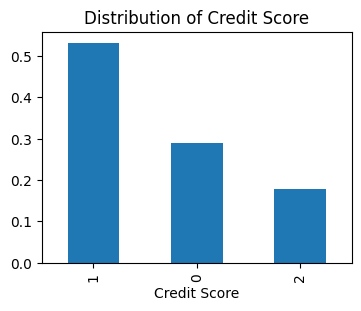

In [213]:
# What is the distribution of the target variable?
ax=y_train.value_counts(normalize=True).plot(kind='bar', figsize=(4, 3))
ax.set_title('Distribution of Credit Score')
ax.set_xlabel('Credit Score')

After manually inspecting each of the columns, we realize that there are variables that should be numerical and are not being signalled as so due to the fact that there is wrongly-entered data in it. Therefore we define below which features should be by nature categorical and numerical. Our target variable called Credit Score is categorical and has either bad, standard or good. This means we have a multiclassification problem. In order to train models we already transformed the target variable to numbers ordered in an ordinal way to ensure model training. To further inspect our features and plot the different distributions or values from our training set we first have to clean the data appropriatley to have to correct type of each feature.

In [214]:
# This function would be used to identify incorrect values in numerical columns

def is_numeric(x):
    try:
        float(x)
        return True
    except:
        return False
# We start by signalling which variables should be categorical and which should be numerical of the feature 
categorical_variables = [ "Month", "Occupation", "Type_of_Loan", "Credit_Mix", "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour"]
numerical_variables = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

numerical_evaluate_further = []
categorical_evaluate_further = []

for column in X_train.columns:
    print(f'Analyzing column {column}')

    if column in numerical_variables: # Evaluating numerical variables

        if X_train[column].dtype not in ["float64", "int64"]: # Evaluating numeric with wrong datatype
            X_train['is_numeric'] = X_train[column].apply(is_numeric)
            invalid_values = X_train[X_train["is_numeric"] == False][column].value_counts()
            print(f'''{column} does not seem to be read as the data type that corresponds to it. 
                It has {invalid_values.shape[0]} invalid values. There are {invalid_values.nunique()} unqiue invalid values.
                The 5 most common being: {invalid_values.head(5)}
                The 5 least common being: {invalid_values.tail(5)}''')
            numerical_evaluate_further.append(column)
            
        elif X_train[column].isnull().sum() > 0: # Evaluating numeric with correct data type but missings
            print(f'Column {column} has the correct datatype and has {X_train[column].isnull().sum()} ({(X_train[column].isnull().sum()/X_train[column].shape[0])*100:.2f}%) missing values')

        else: # Evaluating those that apparently don't have a problem at first sight
            print(f'Column {column} seems to be ok')

    else:
        print(f'{column} has {X_train[column].nunique()} unique values')
        print(f'{column} has {X_train[column].isnull().sum()} missings')
        if X_train[column].nunique() > 20 or (X_train[column].isnull().sum()/X_train[column].shape[0]) > 0.01:
            categorical_evaluate_further.append(column)
            print(X_train[column].value_counts().head(5))
            print(X_train[column].value_counts().tail(5))

X_train.drop('is_numeric', axis=1, inplace=True)
            

Analyzing column Month
Month has 29 unique values
Month has 0 missings
Month
July     5013
April    5005
March    4969
May      4968
June     4952
Name: count, dtype: int64
Month
Marcm     1
Jay       1
AuYust    1
Xarch     1
MaL       1
Name: count, dtype: int64
Analyzing column Age
Age does not seem to be read as the data type that corresponds to it. 
                It has 81 invalid values. There are 30 unqiue invalid values.
                The 5 most common being: Age
29_    75
38_    66
35_    63
32_    63
36_    62
Name: count, dtype: int64
                The 5 least common being: Age
3339_    1
1843_    1
5373_    1
4383_    1
780_     1
Name: count, dtype: int64
Analyzing column Occupation
Occupation has 31 unique values
Occupation has 43 missings
Occupation
_______          2864
Architect        2622
Lawyer           2609
Scientist        2532
Media_Manager    2509
Name: count, dtype: int64
Occupation
musician      23
mechanic      22
engineer      22
architect     20
jour

# We still have to include here the check with realtionship between target and variables!! Correlation

import numpy as np
import matplotlib.pyplot as plt


# 2. Compute the Pearson correlation matrix
corr = X_train[numerical_variables].corr()

# 3. Plot the heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(np.arange(len(numerical_variables)), numerical_variables, rotation=90)
plt.yticks(np.arange(len(numerical_variables)), numerical_variables)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# 4. Extract all unique feature‐pairs with |r| > 0.7
corr_pairs = (
    corr
      .abs()                          # absolute correlations
      .unstack()                      # long form
      .reset_index(name='corr')       # name the new column
)
corr_pairs.columns = ['feature_1', 'feature_2', 'corr']

# filter out self‐pairs and duplicates (A,B vs B,A)
strong_pairs = (
    corr_pairs[
        (corr_pairs['feature_1'] < corr_pairs['feature_2']) &
        (corr_pairs['corr'] > 0.7)
    ]
    .sort_values('corr', ascending=False)
    .reset_index(drop=True)
)

print("Highly correlated feature pairs (|r| > 0.7):")
print(strong_pairs)


Initial data cleaning: The piece of code actually highlights some useful things, which would be the basis for our initial data cleaning:
- For numerical values that do not have a numerical data type associated, it seems that the main problem cauising this is the trailing underscore.
- There are a fair quantity of numerical variables that are indeed classified as numerical data types, but have missings
- There are a few numerical variables that do not face data type or missings problems, thus they can be ready for the next step of data evaluation.
- Most categorical variables can be evaluated with a bar chart
- Most categorical variables do not have many missings

In [215]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import re
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

# These functions can be to every data. So also for new incoming data this cleaning step has to be done

allow_us = ["Payment_Behaviour"]

# 1) Transformer to strip trailing underscores & coerce numeric vs categorical
class UnderscoreCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_cols, cat_cols, allow_underscore_cols=None):
        self.numeric_cols = set(numeric_cols)
        self.cat_cols     = set(cat_cols)
        self.allow_underscore = set(allow_underscore_cols or [])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            # 1) strip underscores unless explicitly allowed
            if col not in self.allow_underscore:
                X[col] = X[col].astype(str).str.replace("_", "", regex=False)

            # 2) coerce numerics
            if col in self.numeric_cols:
                X[col] = pd.to_numeric(X[col], errors="coerce")

            # 3) lowercase cats, empty → np.nan
            if col in self.cat_cols:
                # .astype(str) will turn np.nan → 'nan', so we do a fillna first:
                X[col] = (
                    X[col]
                      .where(pd.notna(X[col]), "")         # keep np.nan as ""
                      .astype(str)
                      .str.lower()
                      .replace({"": np.nan, "nan": np.nan})
                )
        return X

remove_ = Pipeline([
    ("underscores", UnderscoreCleaner(numerical_variables, categorical_variables, allow_us)),
])

no_X_train=remove_.fit_transform(X_train)
no_X_train.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


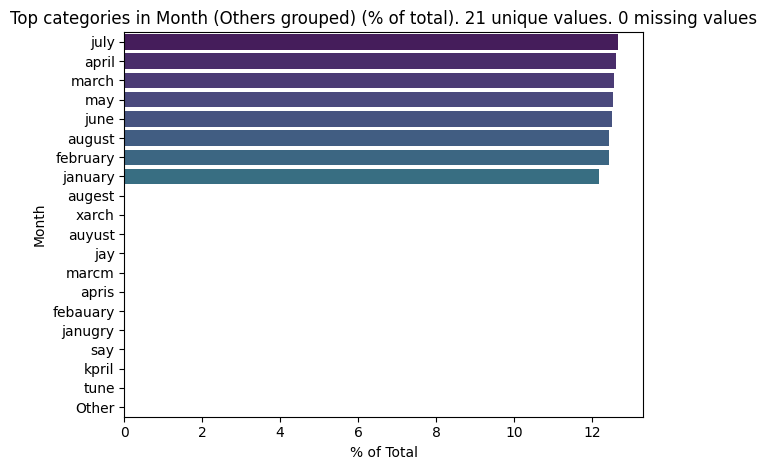

count    39965.000000
mean       111.596922
std        690.056812
min       -500.000000
50%         33.000000
95%         53.000000
99%       4181.600000
max       8697.000000
Name: Age, dtype: float64


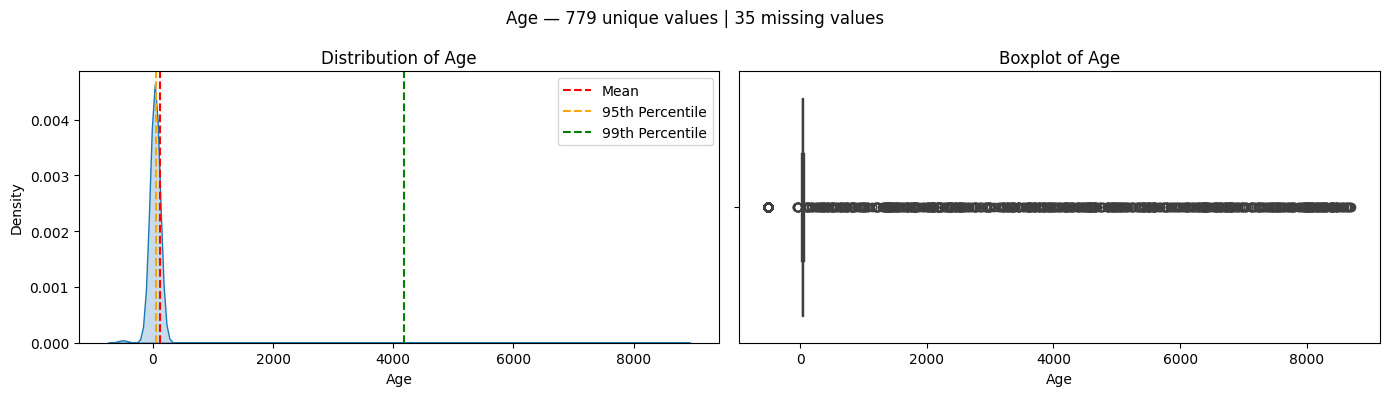

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


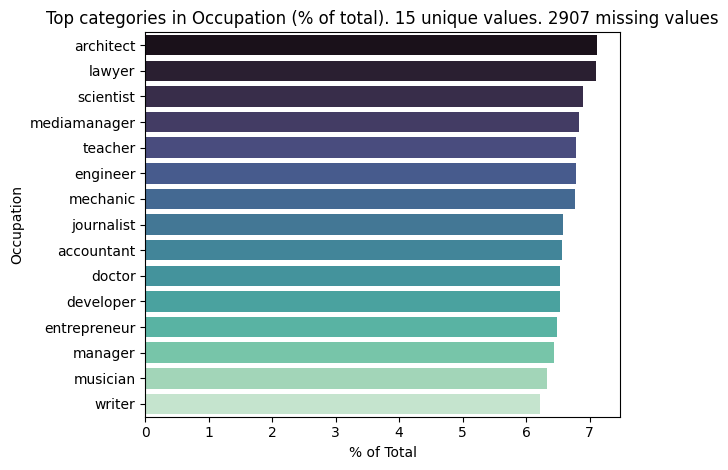

count    3.995800e+04
mean     1.777512e+05
std      1.441331e+06
min      7.005930e+03
50%      3.741218e+04
95%      1.349512e+05
99%      1.799488e+05
max      2.417715e+07
Name: Annual_Income, dtype: float64


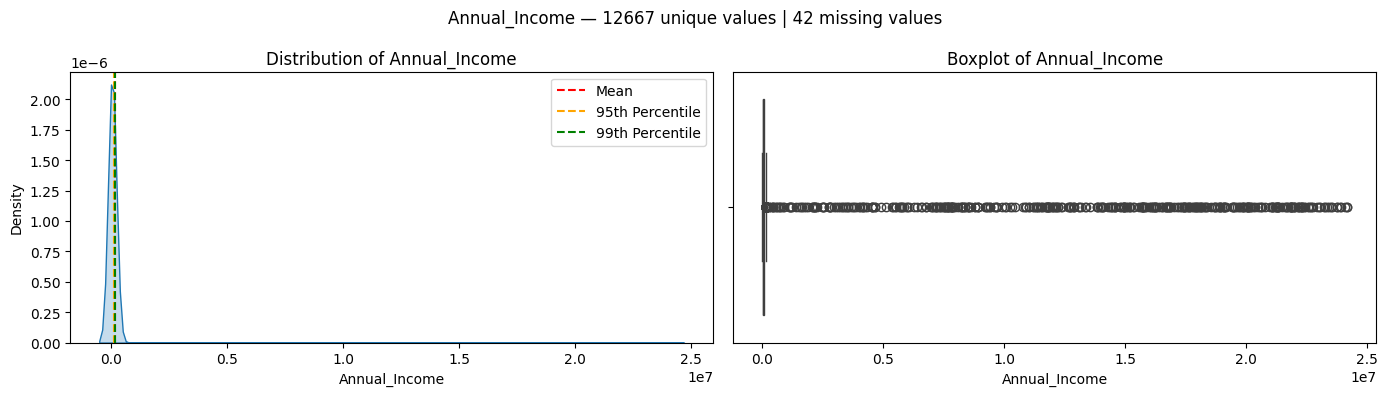

count    33984.000000
mean      4195.715868
std       3197.886945
min        303.645417
50%       3081.940000
95%      10879.515667
99%      13815.260000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


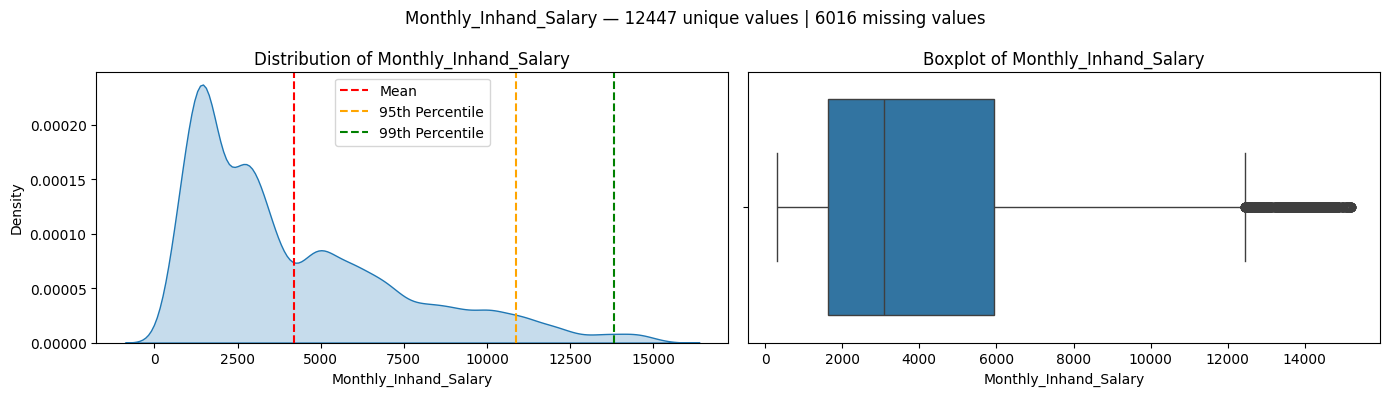

count    39964.000000
mean        17.598188
std        119.961247
min         -1.000000
50%          6.000000
95%         10.000000
99%        485.220000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64


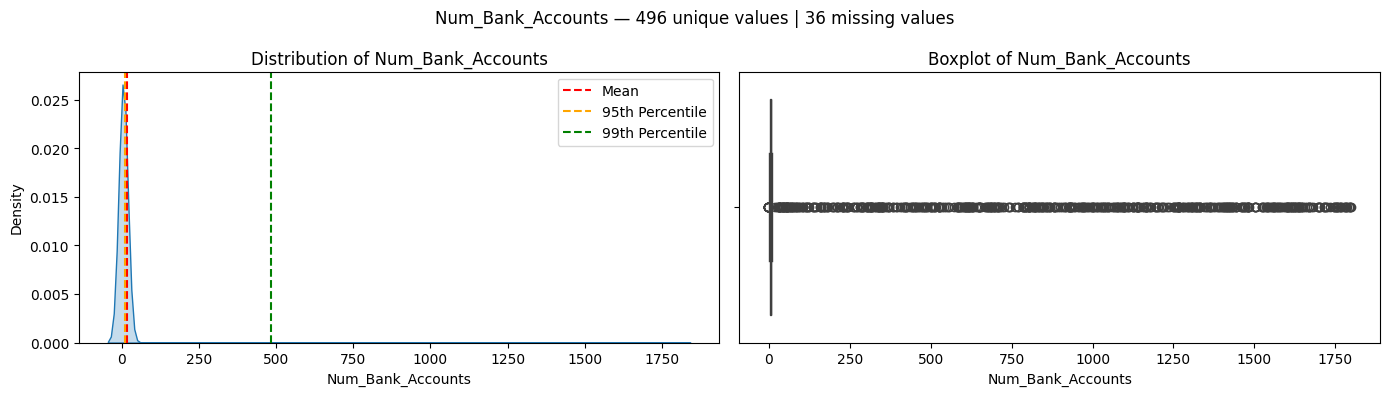

count    39967.000000
mean        22.433558
std        129.841070
min          0.000000
50%          6.000000
95%         10.000000
99%        846.680000
max       1498.000000
Name: Num_Credit_Card, dtype: float64


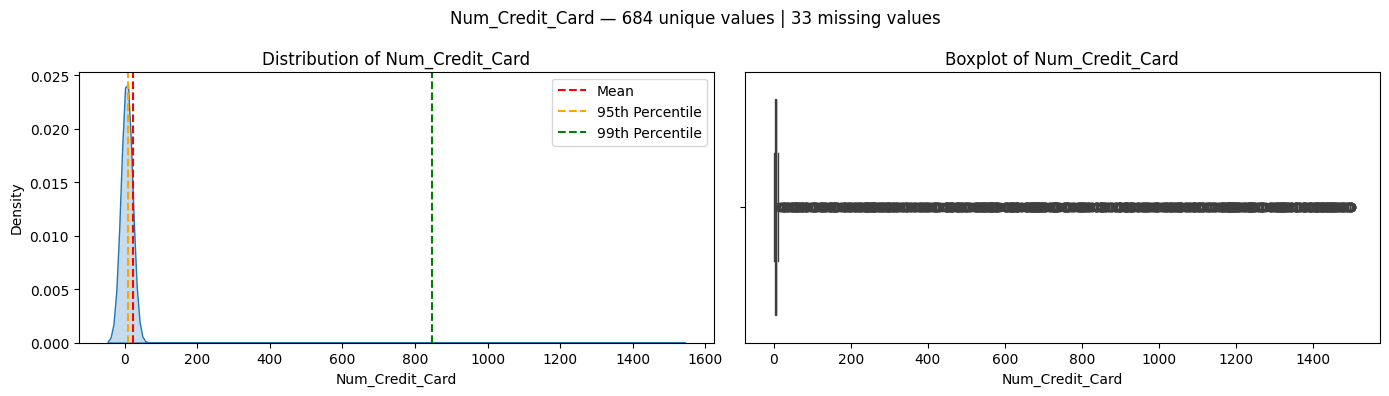

count    39966.000000
mean        71.070460
std        458.745284
min          1.000000
50%         14.000000
95%         32.000000
99%       2826.050000
max       5788.000000
Name: Interest_Rate, dtype: float64


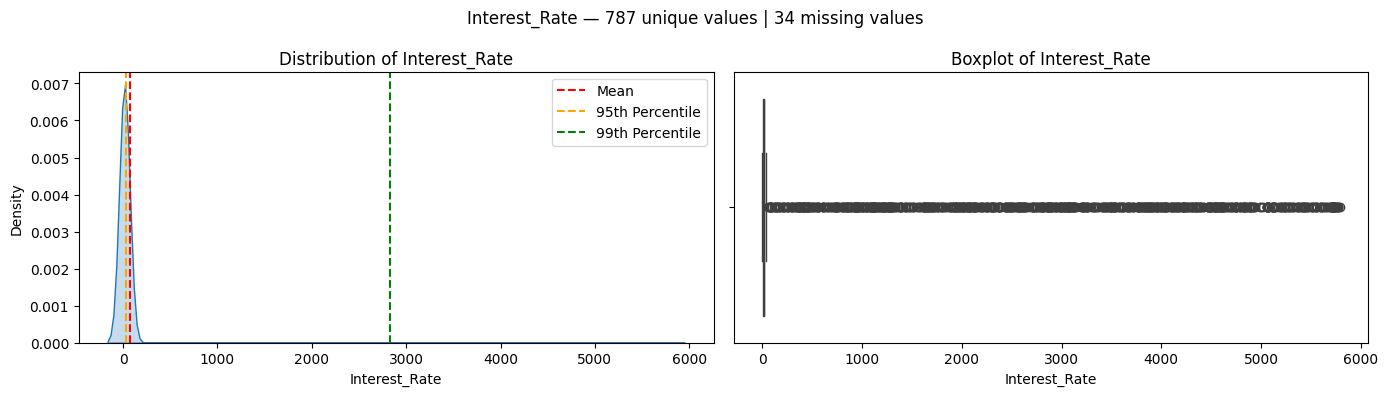

count    39956.000000
mean         2.963435
std         62.475962
min       -100.000000
50%          3.000000
95%          8.000000
99%          9.000000
max       1484.000000
Name: Num_of_Loan, dtype: float64


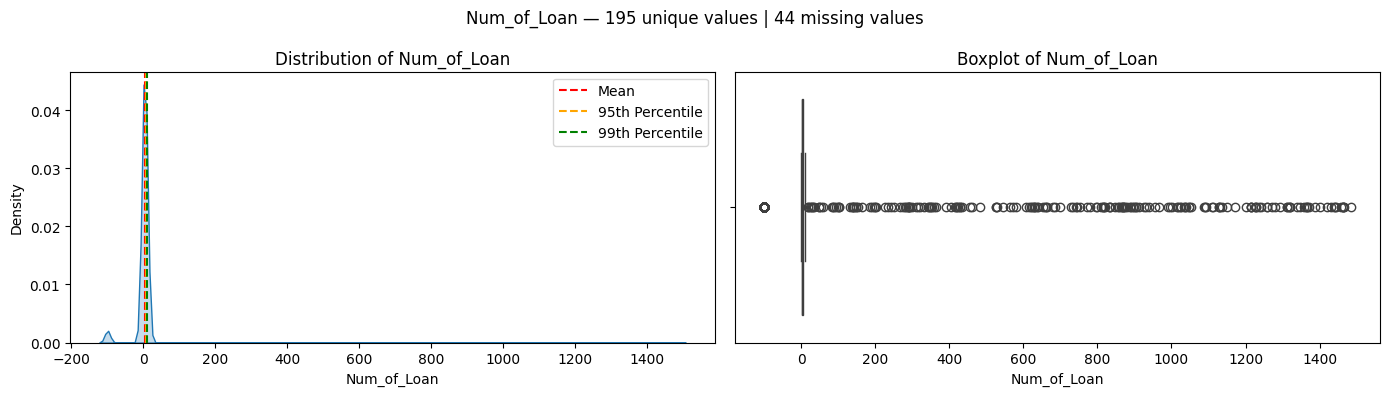

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


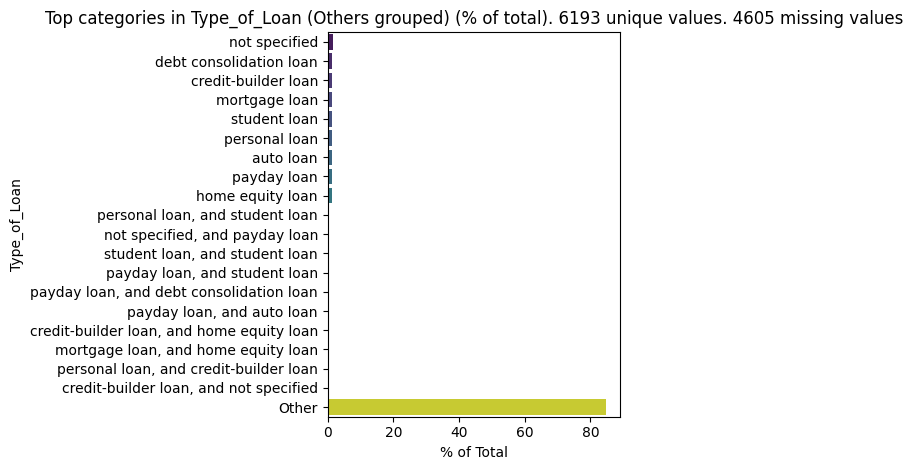

count    40000.000000
mean        21.079625
std         14.848483
min         -5.000000
50%         18.000000
95%         54.000000
99%         61.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64


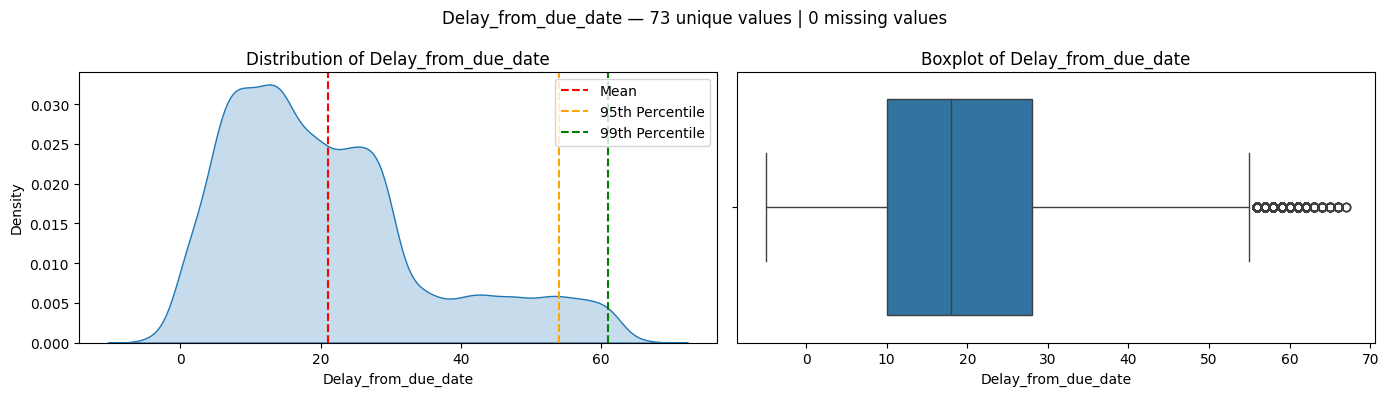

count    37303.000000
mean        31.193765
std        231.040464
min        -18.000000
50%         14.000000
95%         24.000000
99%         27.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


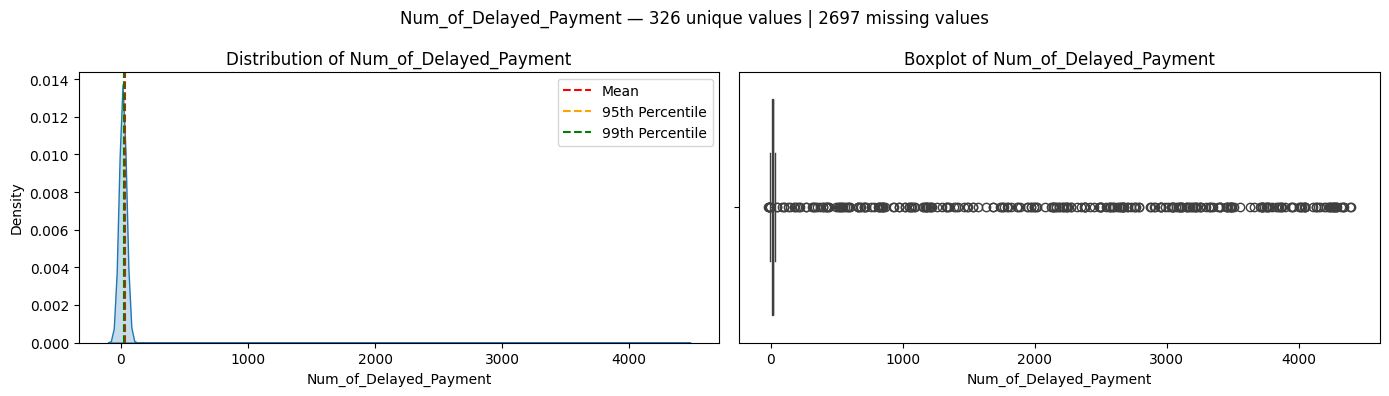

count    39168.000000
mean        10.410309
std          6.809919
min         -6.490000
50%          9.420000
95%         23.630000
99%         28.743300
max         35.980000
Name: Changed_Credit_Limit, dtype: float64


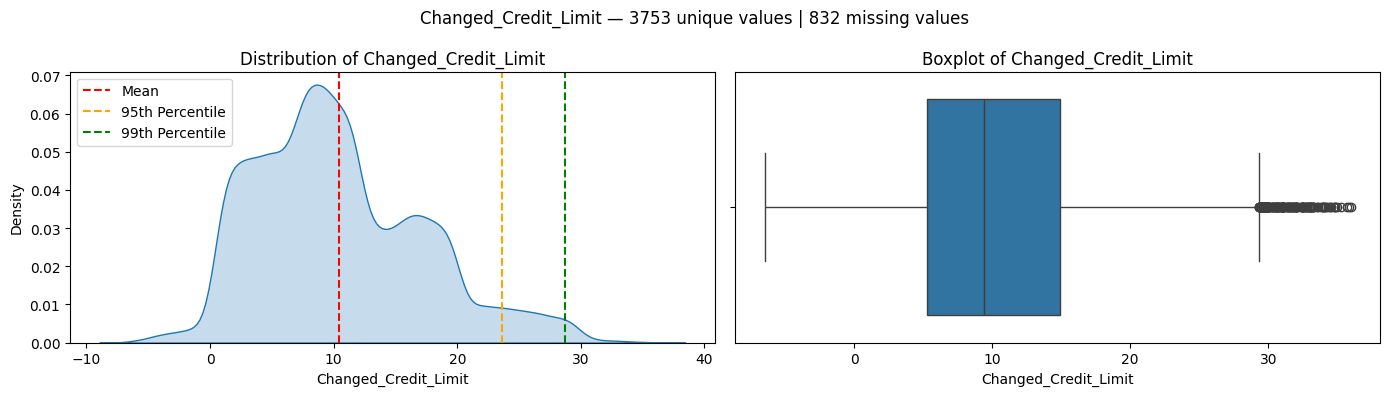

count    39224.000000
mean        27.301601
std        190.716625
min          0.000000
50%          6.000000
95%         13.000000
99%       1067.770000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64


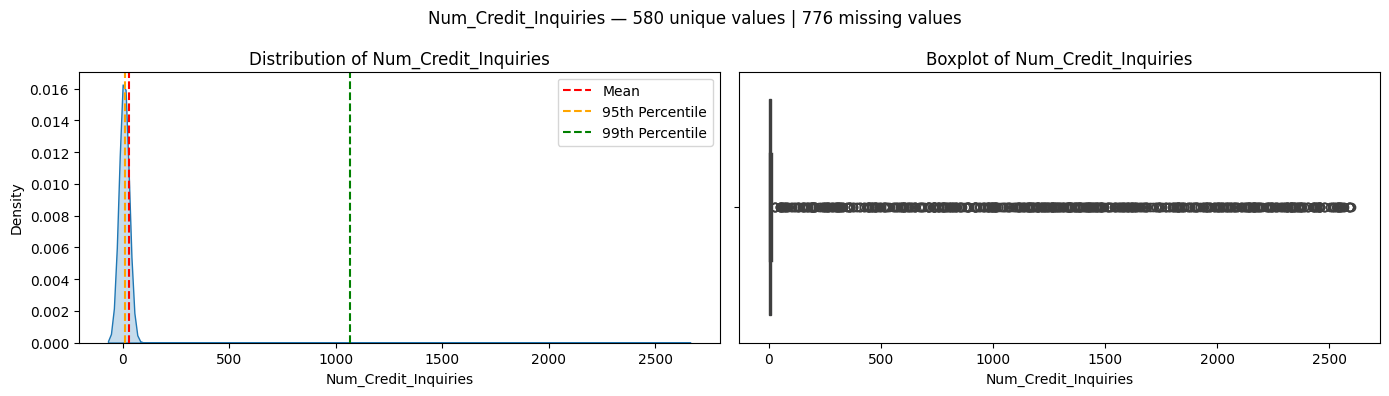

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


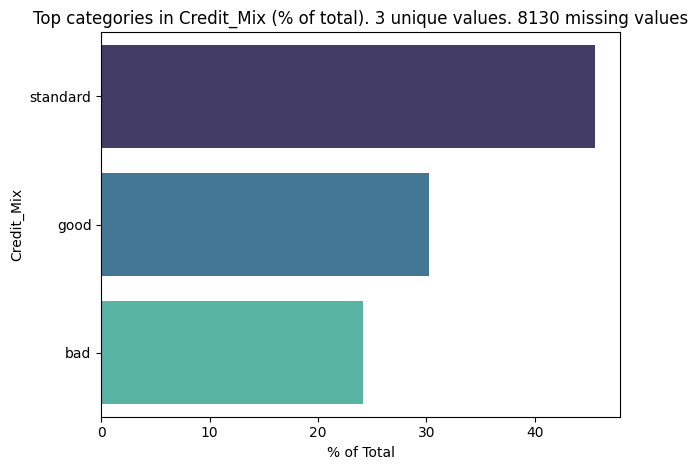

count    40000.000000
mean      1432.108375
std       1165.893533
min          0.230000
50%       1164.410000
95%       4104.070000
99%       4811.230000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


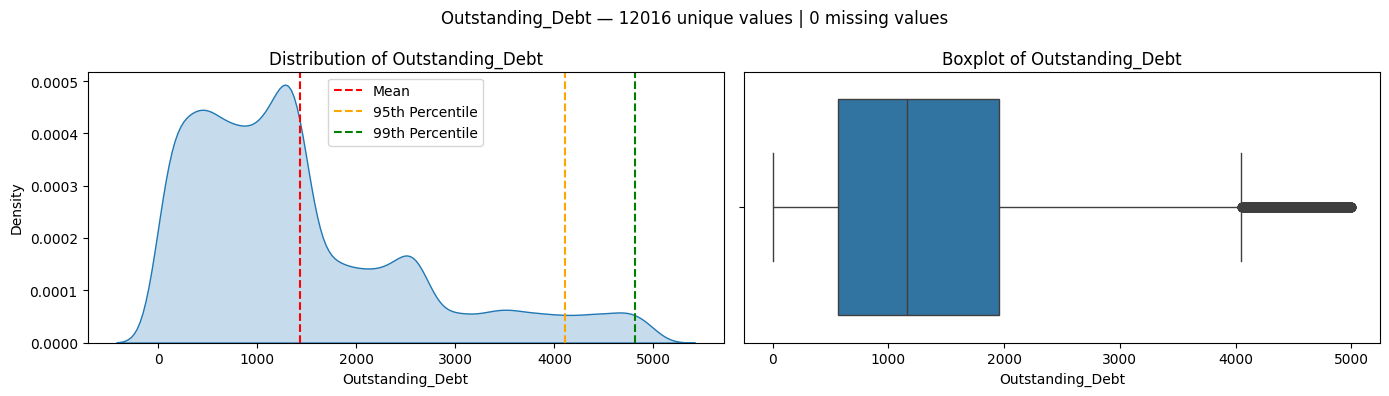

count    40000.000000
mean        32.252731
std          5.110700
min         20.172942
50%         32.290075
95%         40.173638
99%         42.431425
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64


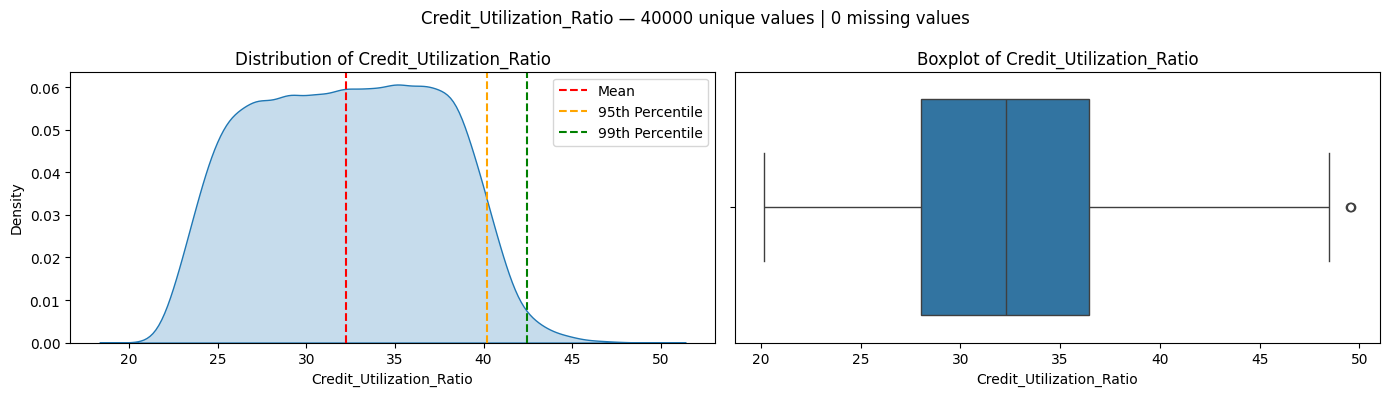

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


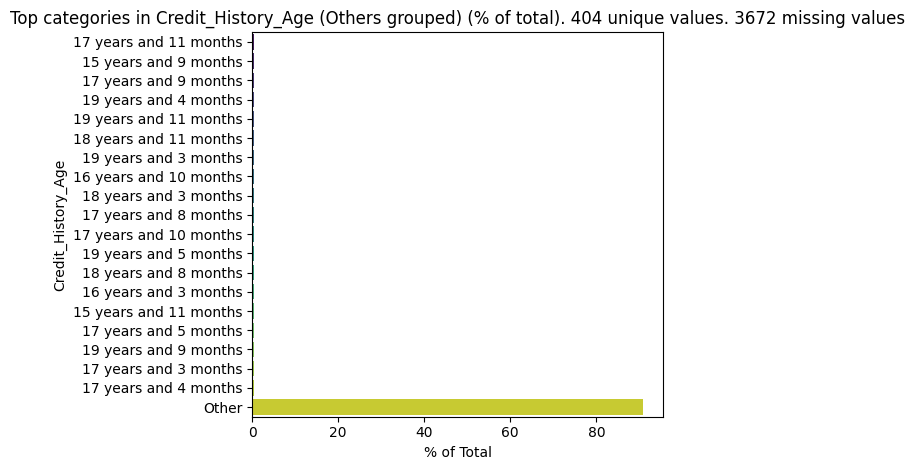

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


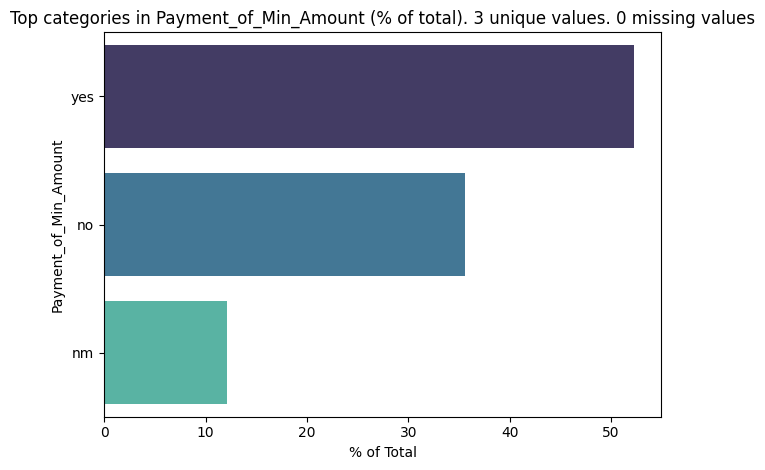

count    40000.000000
mean      1410.716525
std       8316.666973
min          0.000000
50%         69.241923
95%        434.171937
99%      55805.090000
max      82103.000000
Name: Total_EMI_per_month, dtype: float64


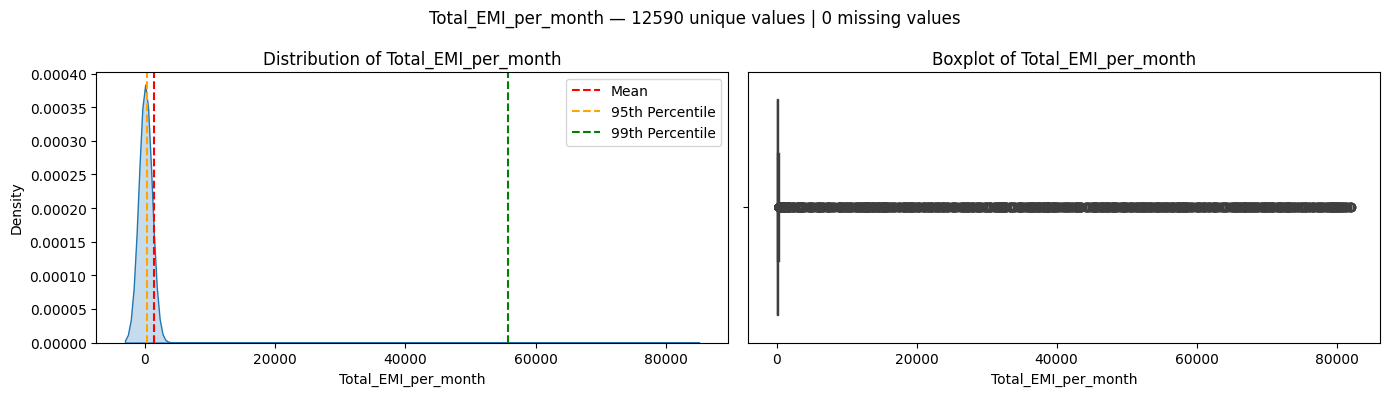

count    38196.000000
mean       648.021803
std       2065.281193
min          0.000000
50%        136.099592
95%       1203.544609
99%      10000.000000
max      10000.000000
Name: Amount_invested_monthly, dtype: float64


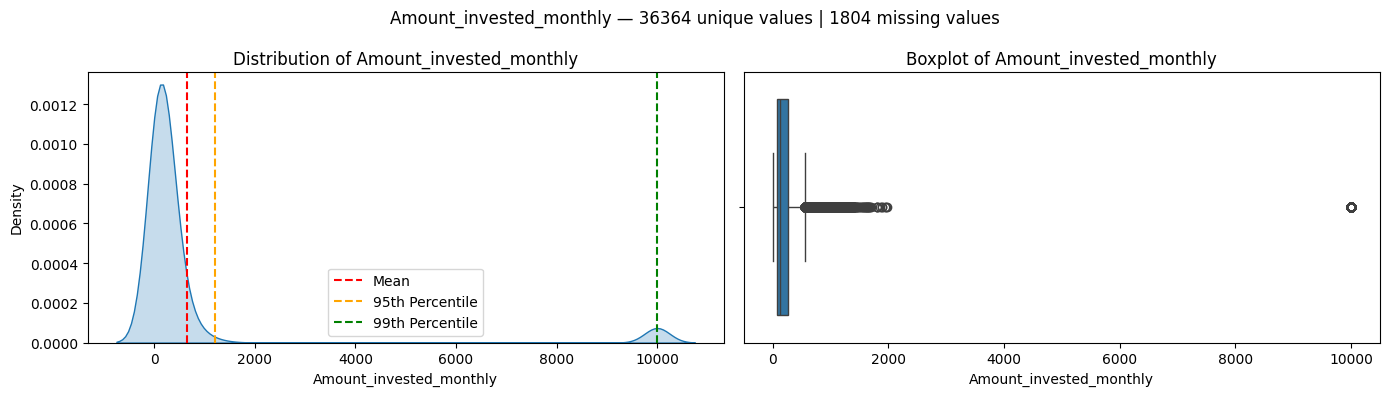

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/1832410627.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


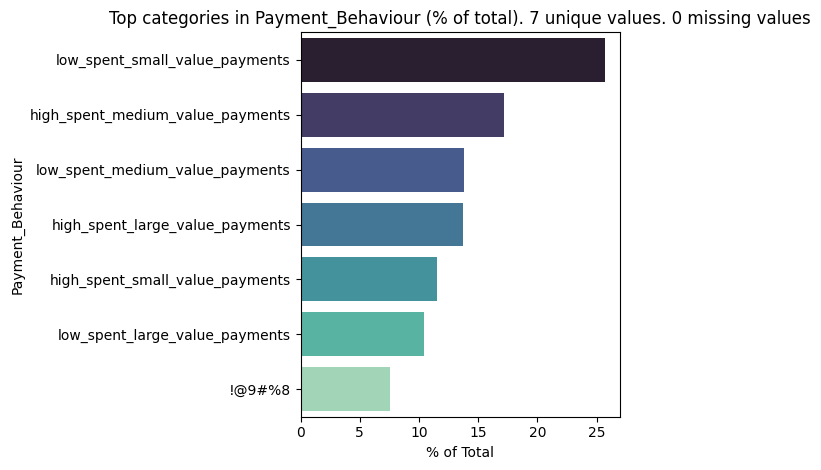

count    3.953100e+04
mean    -3.372880e+22
std      3.352921e+24
min     -3.333333e+26
50%      3.360602e+02
95%      8.641492e+02
99%      1.145581e+03
max      1.566613e+03
Name: Monthly_Balance, dtype: float64


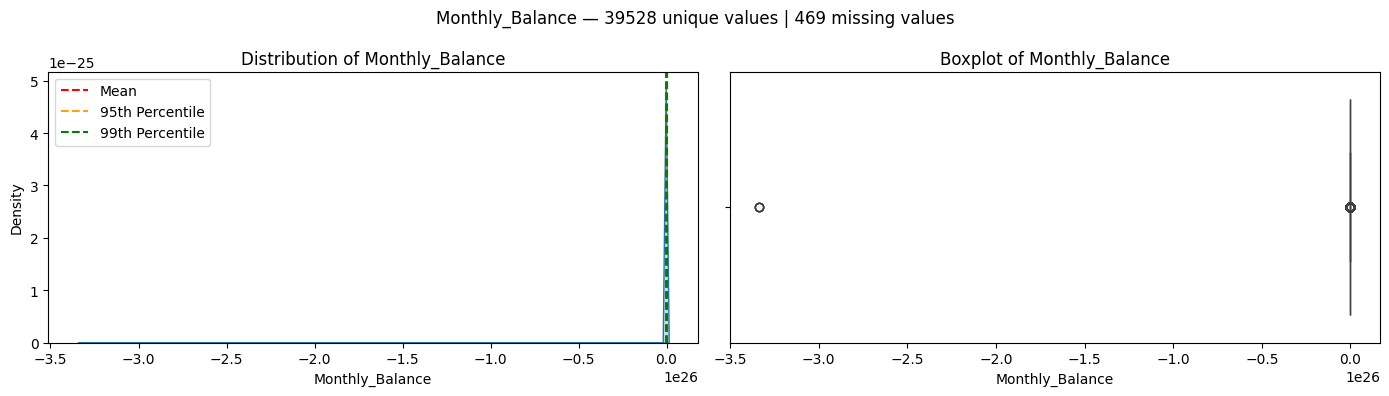

In [216]:
# With the data with correct data types and with some cleaning having started, we can start visualizing the variables

for variable in no_X_train.columns:

    num_unique = no_X_train[variable].nunique()
    num_missing = no_X_train[variable].isnull().sum()

    if variable in numerical_variables:
        summary_stats = no_X_train[variable].describe(percentiles=[0.95, 0.99]).transpose()
        print(summary_stats)
        mean = summary_stats['mean']
        p95 = summary_stats['95%']
        p99 = summary_stats['99%']

        fig, axes = plt.subplots(1, 2, figsize=(14, 4))

        sns.kdeplot(data=no_X_train, x=variable, ax=axes[0], fill=True)
        axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
        axes[0].axvline(p95, color='orange', linestyle='--', label='95th Percentile')
        axes[0].axvline(p99, color='green', linestyle='--', label='99th Percentile')
        axes[0].set_title(f'Distribution of {variable}')
        axes[0].set_xlabel(variable)
        axes[0].set_ylabel('Density')
        axes[0].legend()

        # Boxplot
        sns.boxplot(data=no_X_train, x=variable, ax=axes[1], orient='h')
        axes[1].set_title(f'Boxplot of {variable}')
        axes[1].set_xlabel(variable)

        fig.suptitle(f'{variable} — {num_unique} unique values | {num_missing} missing values', fontsize=12)
        plt.tight_layout()
        plt.show()


    elif variable in categorical_variables and no_X_train[variable].nunique() <= 20:
        value_counts = no_X_train[variable].dropna().value_counts(normalize=True) * 100
        sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')
        plt.title(f'Top categories in {variable} (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)
        plt.tight_layout()
        plt.show()

    elif variable in categorical_variables:
        # Calculate percentage distribution for all categories
        value_counts = no_X_train[variable].dropna().value_counts(normalize=True) * 100
        top_19 = value_counts.head(19)
        other = value_counts[19:].sum()
        value_counts_plot = pd.concat([top_19, pd.Series({'Other': other})])

        sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')
        plt.title(f'Top categories in {variable} (Others grouped) (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)
        plt.tight_layout()
        plt.show()


In [217]:
#because too many missing values in the data set
X_train=X_train.drop(columns='Monthly_Inhand_Salary')
X_test= X_test.drop(columns='Monthly_Inhand_Salary')

In [218]:
import pandas as pd
import difflib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import re
import difflib
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import re
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

import re
import difflib
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class PlaceholderCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, placeholders=None):
        """
        Replaces any occurrence of the placeholder tokens across all columns with np.nan.
        
        placeholders: iterable of strings to treat as missing values.
                      Defaults to {"nan", "!@9#%8"}.
        """
        self.placeholders = set(placeholders or {"nan", "!@9#%8"})

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = X[col].apply(
                lambda x: np.nan
                if pd.notna(x) and str(x) in self.placeholders
                else x
            )
        return X


class MonthCorrector(BaseEstimator, TransformerMixin):
    def __init__(self,
                 month_col="Month",
                 cutoff=0.6,
                 canonical_months=None):
        self.month_col = month_col
        self.cutoff = cutoff
        self.canonical_months = canonical_months or [
            "January","February","March","April","May","June",
            "July","August","September","October","November","December"
        ]
        self.lookup = {m.lower(): m for m in self.canonical_months}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        cache = {}

        def _best_match(val):
            s = str(val).strip().lower()
            if s in cache:
                return cache[s]
            matches = difflib.get_close_matches(s,
                                                self.lookup.keys(),
                                                n=1,
                                                cutoff=self.cutoff)
            if matches:
                out = self.lookup[matches[0]]
            else:
                out = np.nan
            cache[s] = out
            return out

        X[self.month_col] = (
            X[self.month_col]
             .fillna("")
             .map(_best_match)
        )
        return X

    
#Transformer to convert “2 yrs 3 mos” → total months
class CreditHistoryMonths(BaseEstimator, TransformerMixin):
    def __init__(self, col="Credit_History_Age"):
        self.col = col

    def fit(self, X, y=None): return self
    def transform(self, X):
        def _extract(v):
            if pd.isna(v): return np.nan
            nums = re.findall(r"\d+", str(v))
            yrs = int(nums[0]) if len(nums)>0 else 0
            mos = int(nums[1]) if len(nums)>1 else 0
            return yrs*12 + mos
        X = X.copy()
        X[self.col] = X[self.col].apply(_extract)
        return X

#Transformer to clamp outliers → NaN
class BusinessLimits(BaseEstimator, TransformerMixin):
    def __init__(self, limits):
        """
        limits: dict of col → (low,) or (low, high) or (None, high)
        """
        self.limits = limits

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, bounds in self.limits.items():
            # Normalize bounds into (low, high)
            if len(bounds) == 1:
                low, high = bounds[0], None
            else:
                low, high = bounds

            # Apply lower bound
            if low is not None:
                X[col] = X[col].apply(lambda v: np.nan if v < low else v)
            # Apply upper bound
            if high is not None:
                X[col] = X[col].apply(lambda v: np.nan if v > high else v)

        return X
    
# Transforms each loan type as column
class LoanBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, column="Type_of_Loan"):
        self.column = column
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        # clean & split into lists
        loan_series = (
            X[self.column].fillna("")
                .str.replace(r"\s+and\s+", ",", regex=True)
                .str.replace(r",+", ",", regex=True)
                .str.strip(" ,")
        )
        loan_lists = loan_series.str.split(",").apply(lambda toks: [t.strip() for t in toks if t.strip()])
        # fit the binarizer
        self.mlb.fit(loan_lists)
        return self

    def transform(self, X):
        X = X.copy()
        loan_series = (
            X[self.column].fillna("")
                .str.replace(r"\s+and\s+", ",", regex=True)
                .str.replace(r",+", ",", regex=True)
                .str.strip(" ,")
        )
        loan_lists = loan_series.str.split(",").apply(lambda toks: [t.strip() for t in toks if t.strip()])
        arr = self.mlb.transform(loan_lists)
        cols = [f"Loan_{c.replace(' ', '_').title()}" for c in self.mlb.classes_]
        dummies = pd.DataFrame(arr, columns=cols, index=X.index)
        # merge & drop original
        X = pd.concat([X, dummies], axis=1)
        return X.drop(columns=[self.column])


# ---- put it all together ----
outlier_limits = {
    "Age": (0, 100),
    "Annual_Income": (0, ),
    "Monthly_Inhand_Salary": (0,),
    "Num_Bank_Accounts": (0, 30),
    "Num_Credit_Card": (0, 30),
    "Interest_Rate": (0, 100),
    "Num_of_Loan": (0, 30),
    "Delay_from_due_date": (0,),
    "Num_of_Delayed_Payment": (0,),
    "Num_Credit_Inquiries": (0,),
    "Outstanding_Debt": (0, ),
    "Credit_Utilization_Ratio": (0.0, 100.0),
    "Total_EMI_per_month": (0, ),
    "Amount_invested_monthly": (0, ),
    "Monthly_Balance": (0, ),
}
    
clean_col = Pipeline([
    ("clean_placeholders", PlaceholderCleaner()),
    # Fix month typos → ordered categorical
    ("correct_month", MonthCorrector()),
    # cleans credit history
    ("clean_credit_history",CreditHistoryMonths()),
    #converts credit age to number
    ("credit_age",   CreditHistoryMonths("Credit_History_Age")),
    #logic caps
    ("limits",       BusinessLimits(outlier_limits)),
    #transforms loan column to individual loans
    ("loan_binarizer", LoanBinarizer("Type_of_Loan")),
])
clean_X= clean_col.fit_transform(no_X_train)

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/52564468.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


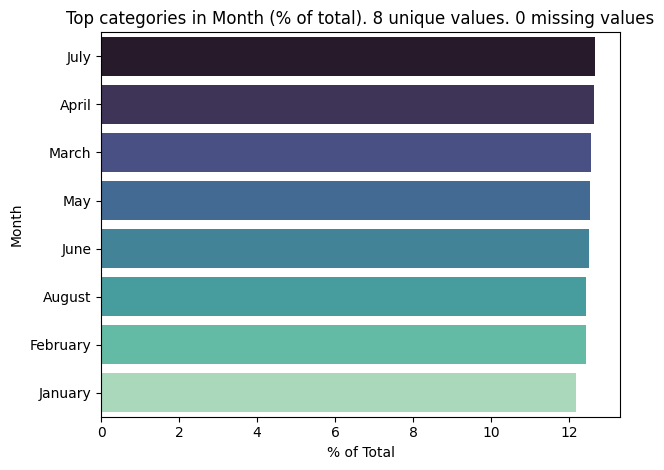

count    38827.000000
mean        33.340176
std         10.791741
min         14.000000
50%         33.000000
95%         52.000000
99%         55.000000
max         99.000000
Name: Age, dtype: float64


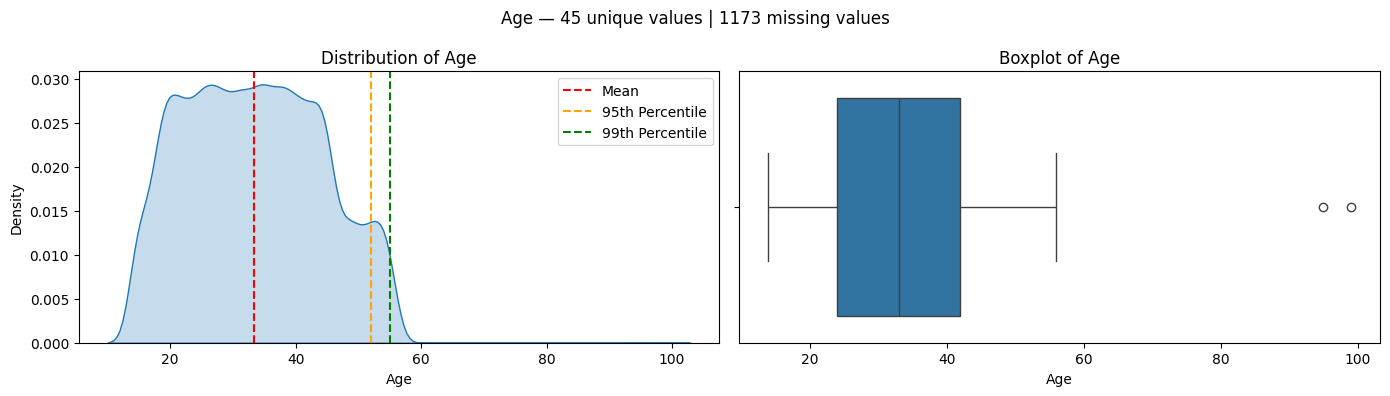

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/52564468.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


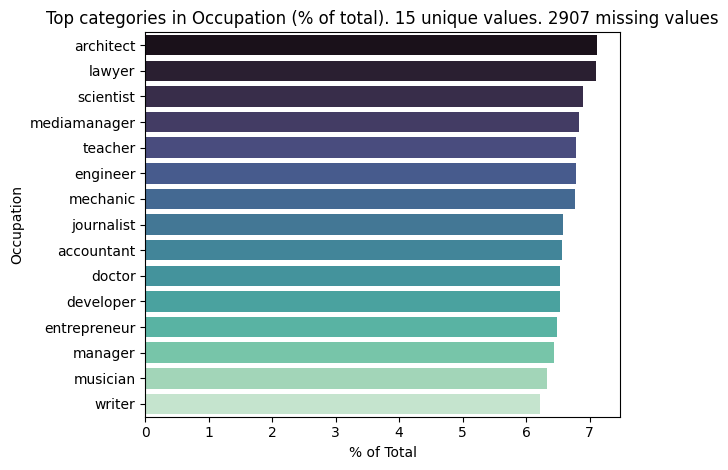

count    3.995800e+04
mean     1.777512e+05
std      1.441331e+06
min      7.005930e+03
50%      3.741218e+04
95%      1.349512e+05
99%      1.799488e+05
max      2.417715e+07
Name: Annual_Income, dtype: float64


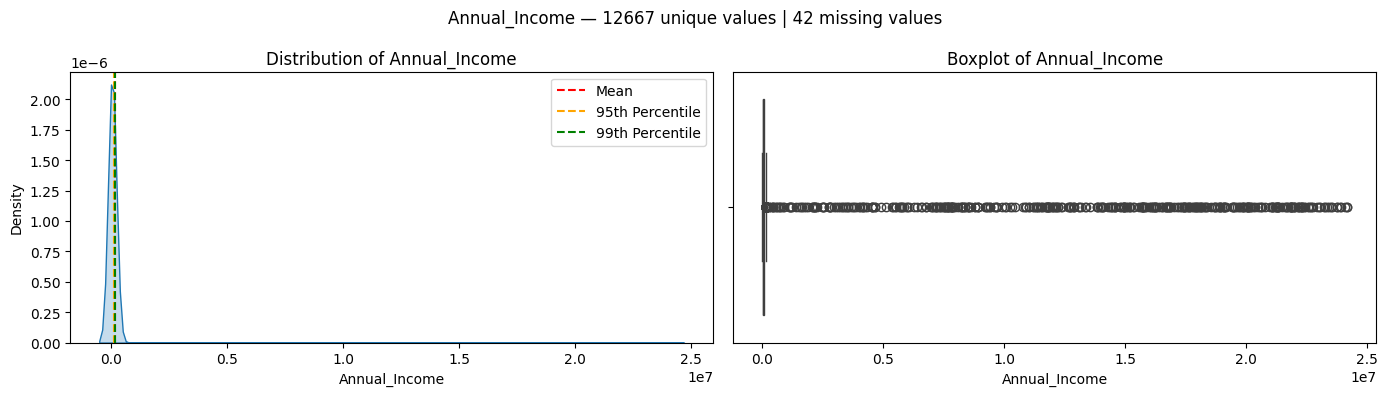

count    33984.000000
mean      4195.715868
std       3197.886945
min        303.645417
50%       3081.940000
95%      10879.515667
99%      13815.260000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


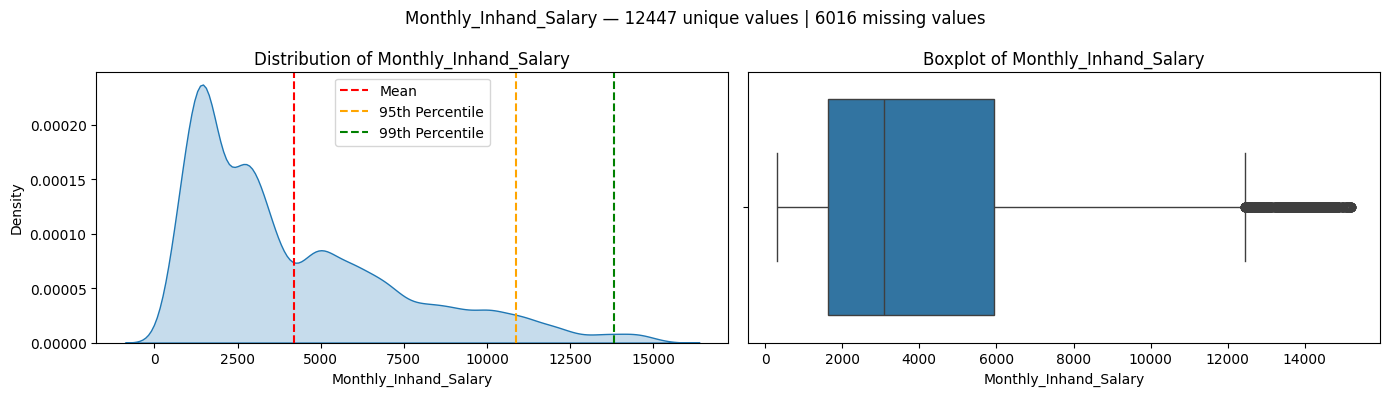

count    39396.000000
mean         5.375317
std          2.602988
min          0.000000
50%          5.000000
95%         10.000000
99%         10.000000
max         28.000000
Name: Num_Bank_Accounts, dtype: float64


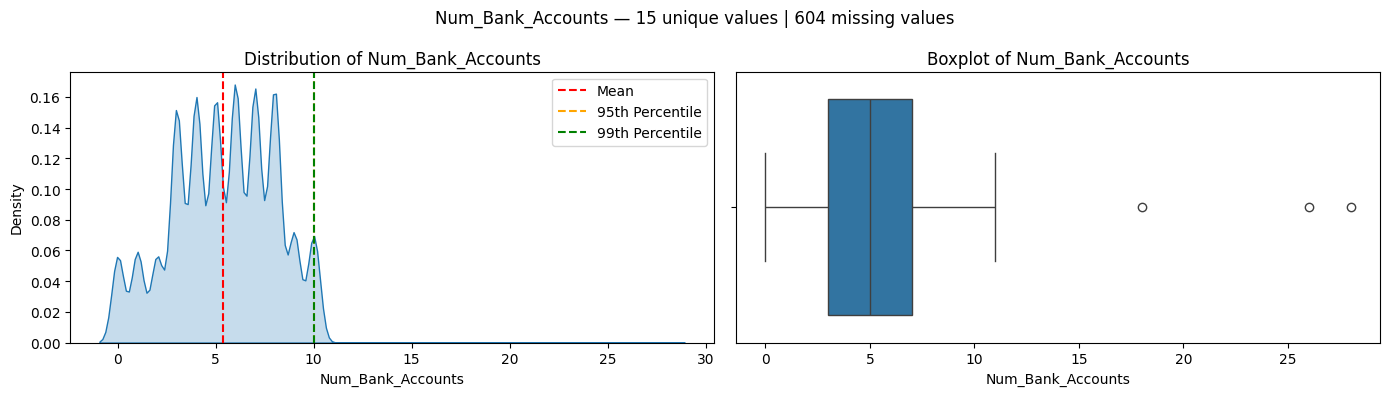

count    39097.000000
mean         5.542395
std          2.094064
min          0.000000
50%          5.000000
95%         10.000000
99%         10.000000
max         28.000000
Name: Num_Credit_Card, dtype: float64


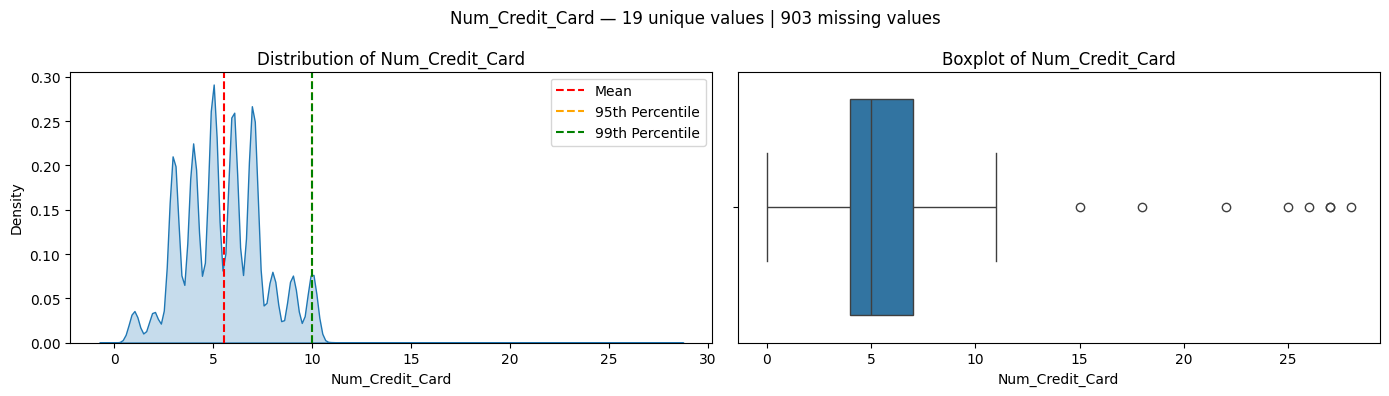

count    39171.000000
mean        14.547701
std          8.775159
min          1.000000
50%         13.000000
95%         31.000000
99%         34.000000
max         95.000000
Name: Interest_Rate, dtype: float64


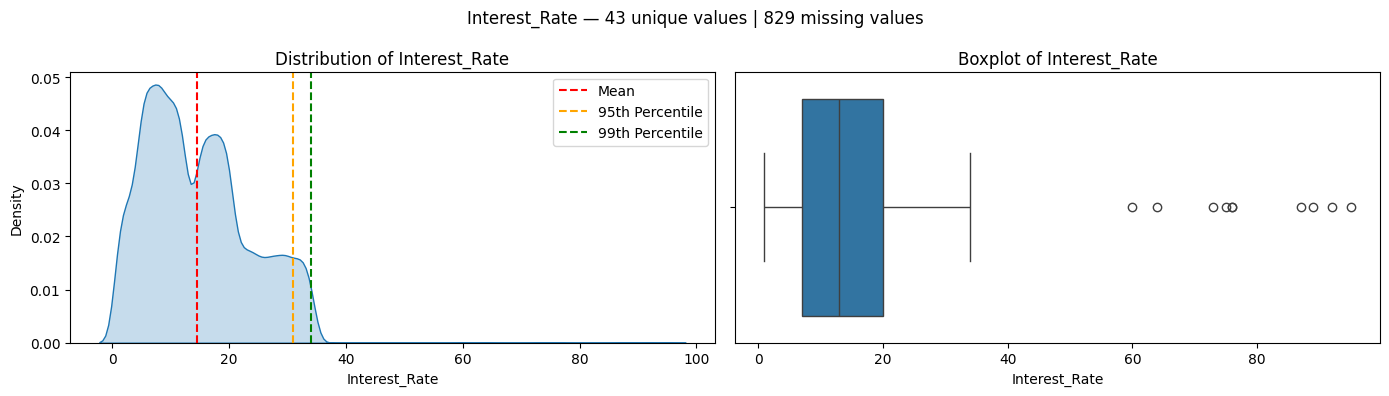

count    38184.000000
mean         3.552038
std          2.469109
min          0.000000
50%          3.000000
95%          8.000000
99%          9.000000
max         29.000000
Name: Num_of_Loan, dtype: float64


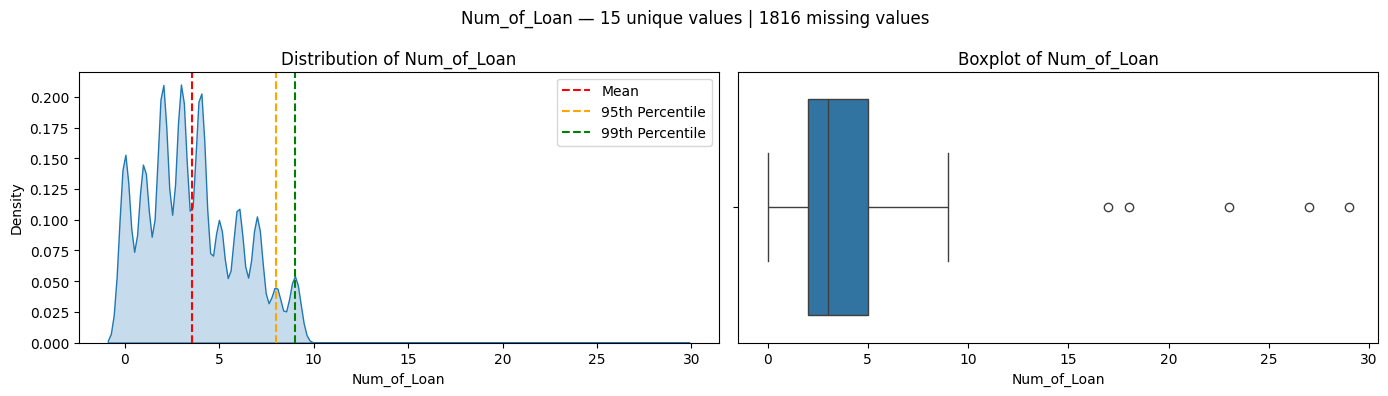

count    39763.000000
mean        21.218469
std         14.782741
min          0.000000
50%         18.000000
95%         54.000000
99%         61.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64


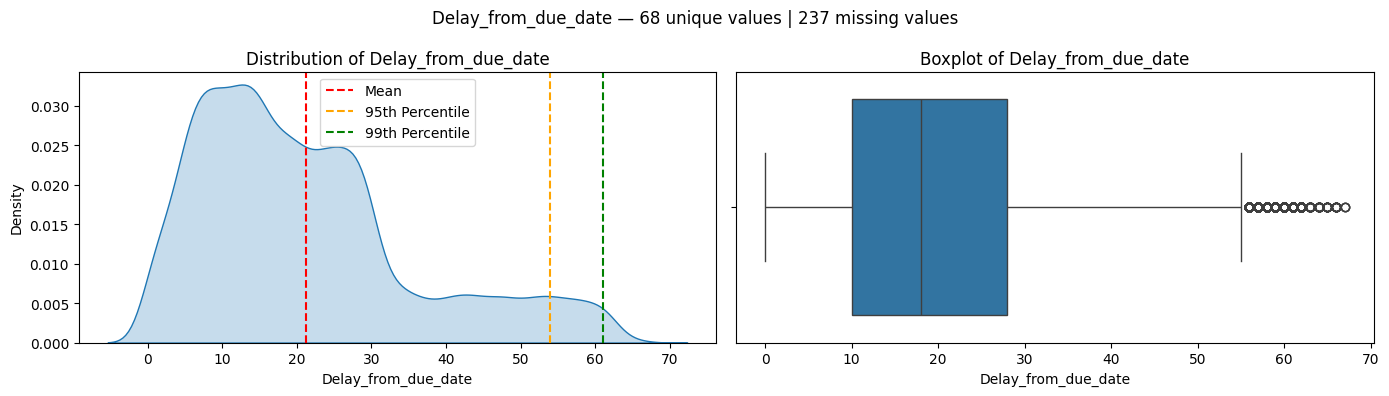

count    37026.000000
mean        31.441501
std        231.885233
min          0.000000
50%         14.000000
95%         24.000000
99%         27.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


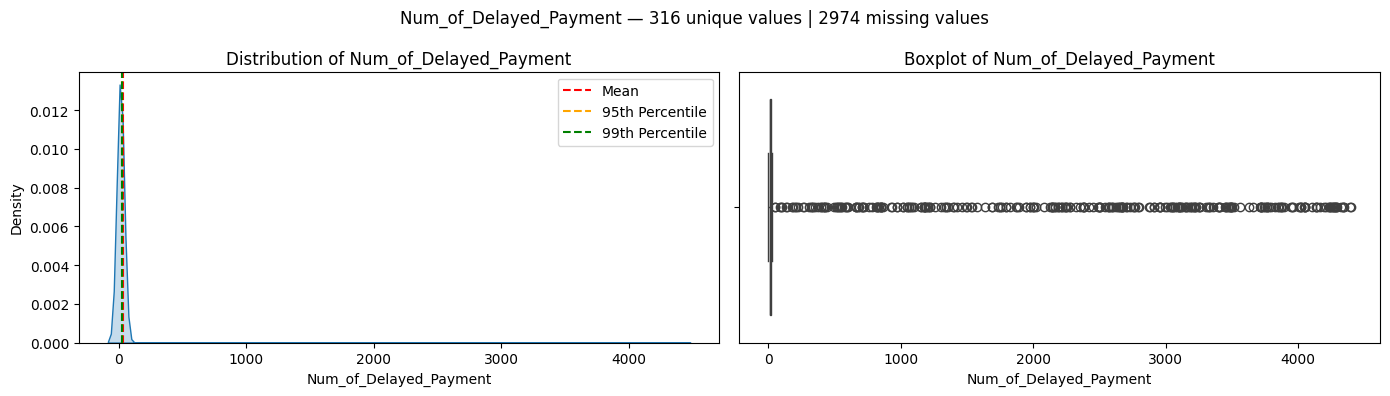

count    39168.000000
mean        10.410309
std          6.809919
min         -6.490000
50%          9.420000
95%         23.630000
99%         28.743300
max         35.980000
Name: Changed_Credit_Limit, dtype: float64


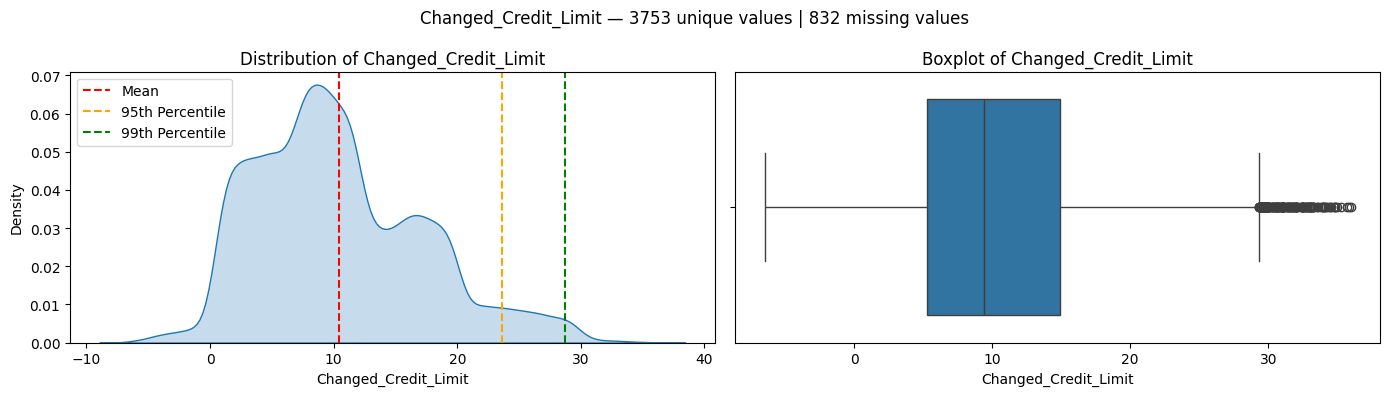

count    39224.000000
mean        27.301601
std        190.716625
min          0.000000
50%          6.000000
95%         13.000000
99%       1067.770000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64


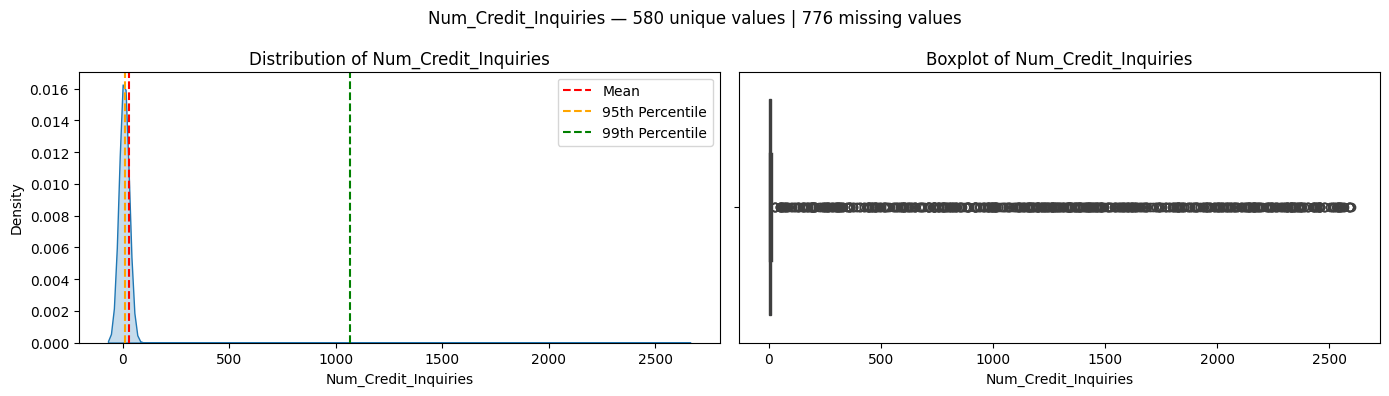

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/52564468.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


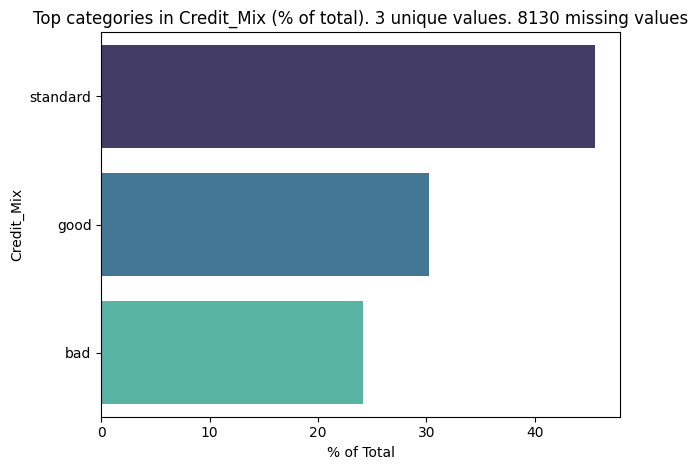

count    40000.000000
mean      1432.108375
std       1165.893533
min          0.230000
50%       1164.410000
95%       4104.070000
99%       4811.230000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


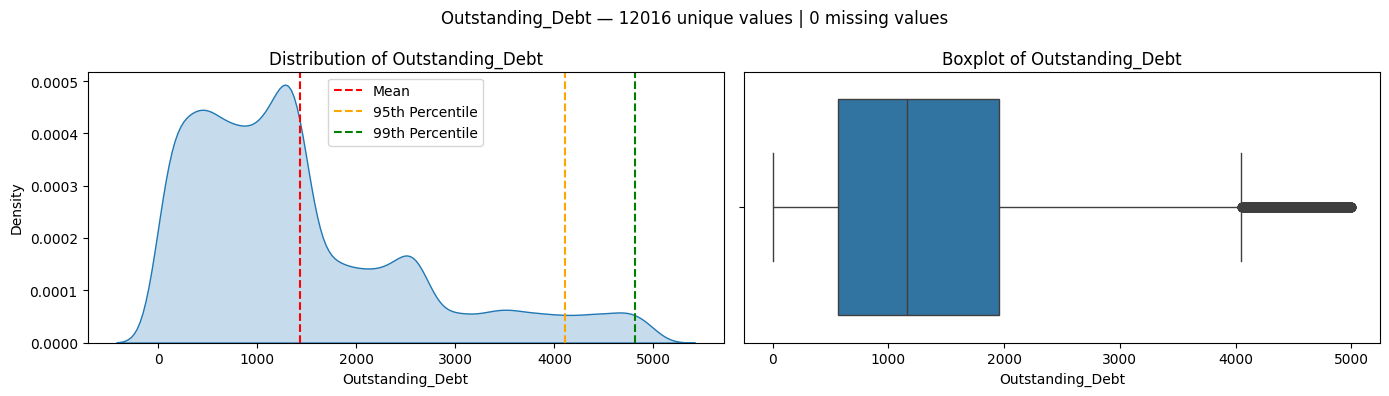

count    40000.000000
mean        32.252731
std          5.110700
min         20.172942
50%         32.290075
95%         40.173638
99%         42.431425
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64


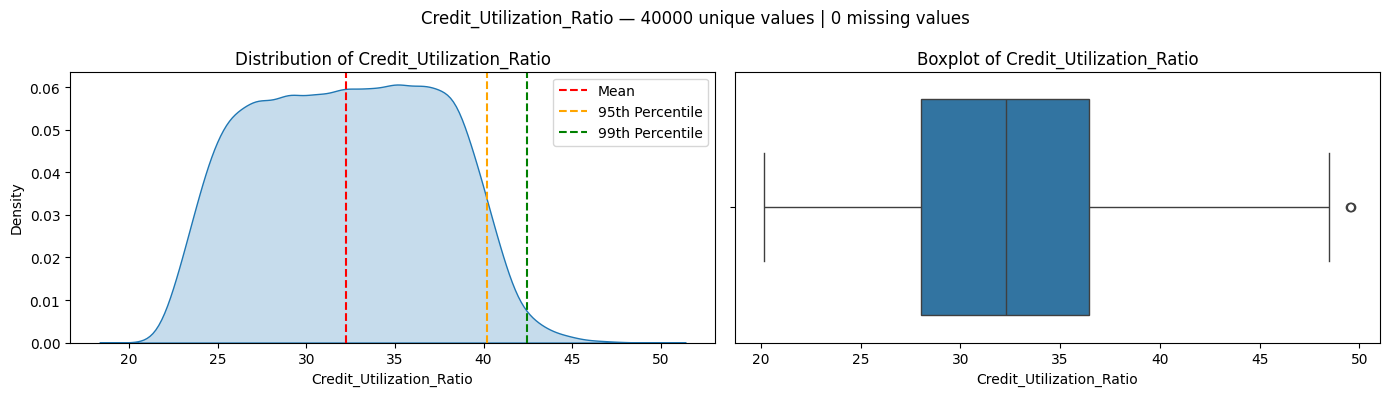

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/52564468.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values,


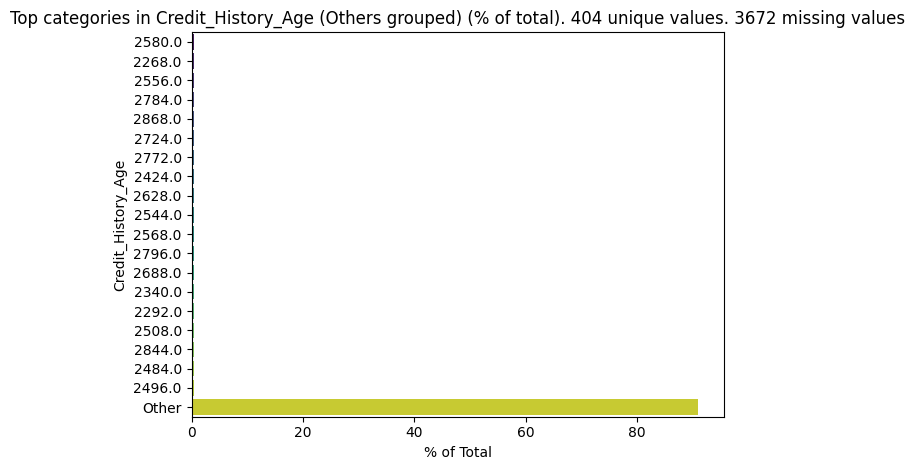

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/52564468.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


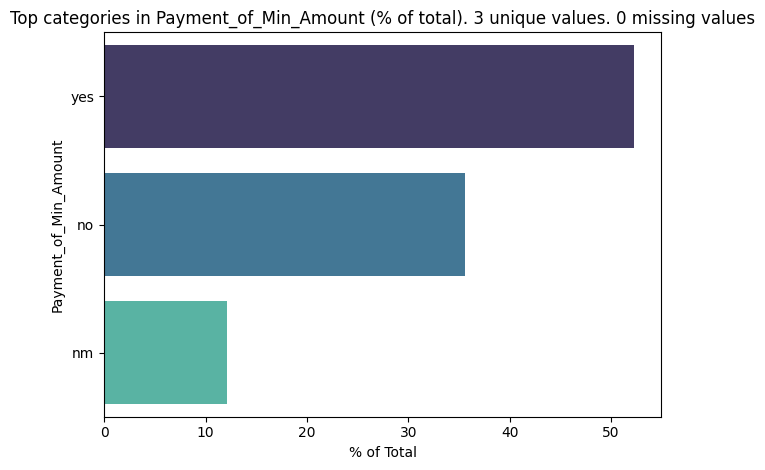

count    40000.000000
mean      1410.716525
std       8316.666973
min          0.000000
50%         69.241923
95%        434.171937
99%      55805.090000
max      82103.000000
Name: Total_EMI_per_month, dtype: float64


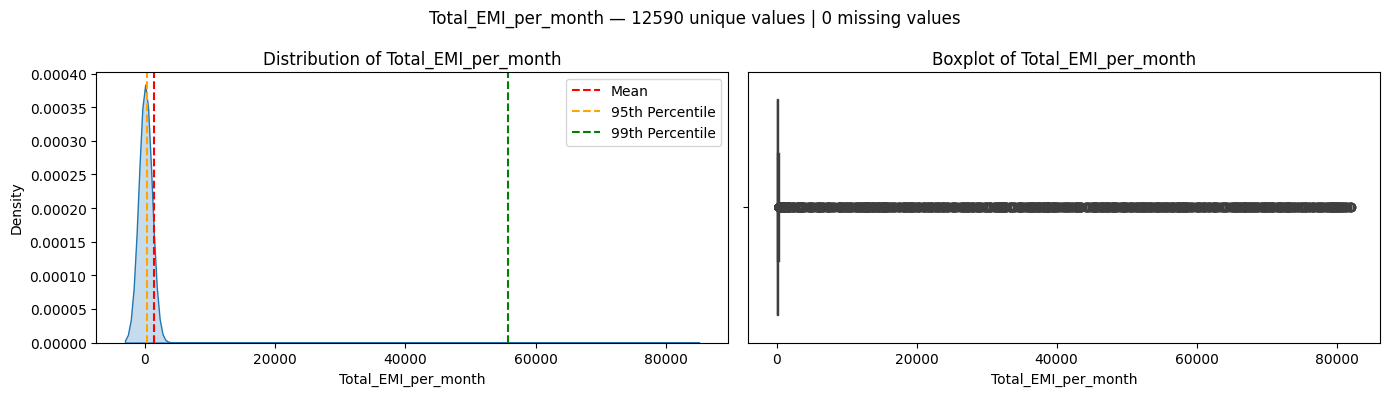

count    38196.000000
mean       648.021803
std       2065.281193
min          0.000000
50%        136.099592
95%       1203.544609
99%      10000.000000
max      10000.000000
Name: Amount_invested_monthly, dtype: float64


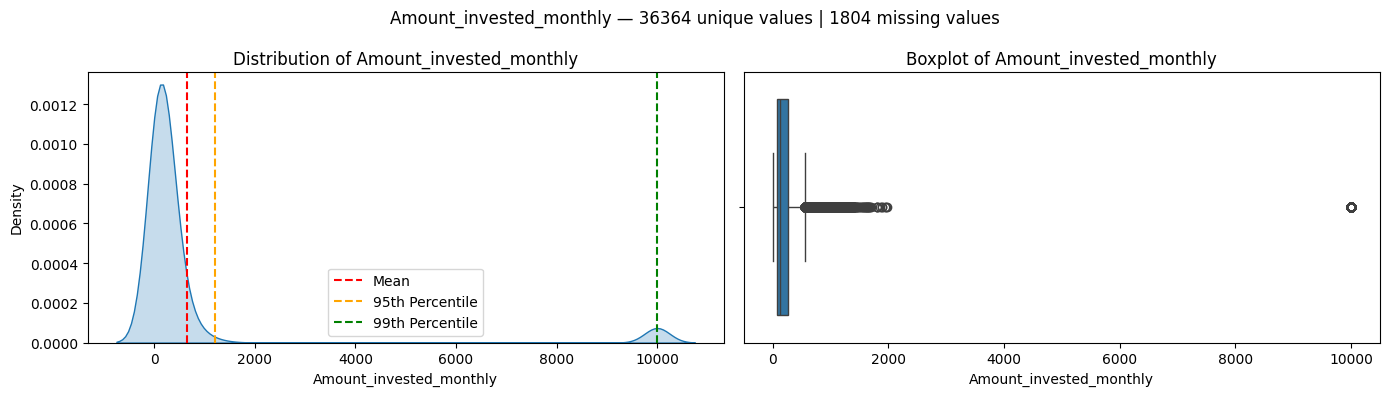

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96188/52564468.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


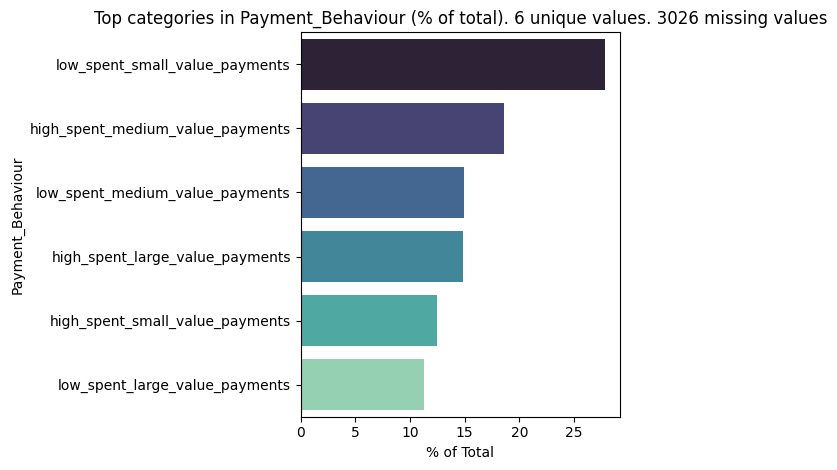

count    39527.000000
mean       402.883491
std        214.873633
min          0.095482
50%        336.069389
95%        864.179168
99%       1145.602305
max       1566.613165
Name: Monthly_Balance, dtype: float64


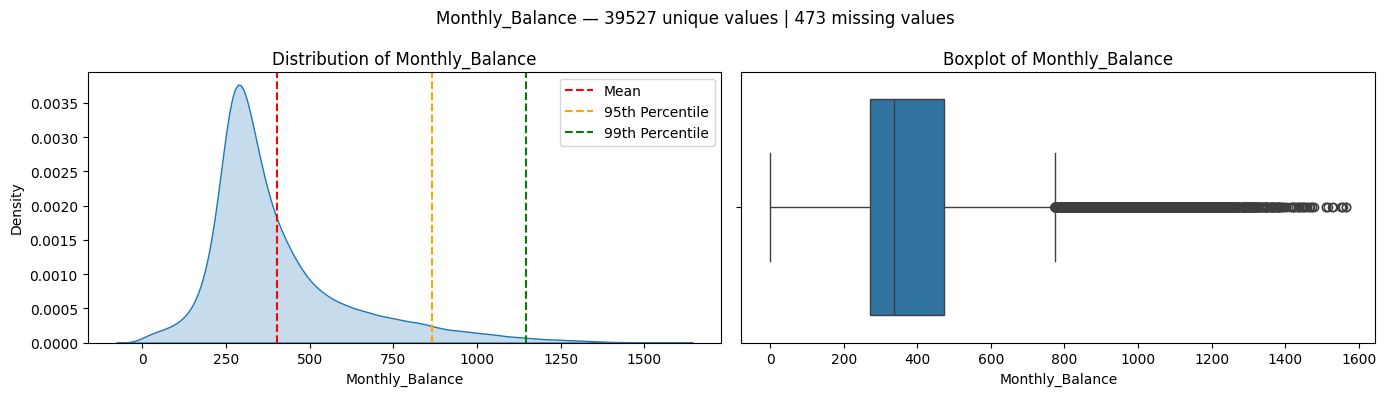

In [219]:
# With the data with correct data types and with some cleaning having started, we can start visualizing the variables

for variable in clean_X.columns:

    num_unique = clean_X[variable].nunique()
    num_missing = clean_X[variable].isnull().sum()

    if variable in numerical_variables:
        summary_stats = clean_X[variable].describe(percentiles=[0.95, 0.99]).transpose()
        print(summary_stats)
        mean = summary_stats['mean']
        p95 = summary_stats['95%']
        p99 = summary_stats['99%']

        fig, axes = plt.subplots(1, 2, figsize=(14, 4))

        sns.kdeplot(data=clean_X, x=variable, ax=axes[0], fill=True)
        axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
        axes[0].axvline(p95, color='orange', linestyle='--', label='95th Percentile')
        axes[0].axvline(p99, color='green', linestyle='--', label='99th Percentile')
        axes[0].set_title(f'Distribution of {variable}')
        axes[0].set_xlabel(variable)
        axes[0].set_ylabel('Density')
        axes[0].legend()

        # Boxplot
        sns.boxplot(data=clean_X, x=variable, ax=axes[1], orient='h')
        axes[1].set_title(f'Boxplot of {variable}')
        axes[1].set_xlabel(variable)

        fig.suptitle(f'{variable} — {num_unique} unique values | {num_missing} missing values', fontsize=12)
        plt.tight_layout()
        plt.show()


    elif variable in categorical_variables and clean_X[variable].nunique() <= 20:
        value_counts = clean_X[variable].dropna().value_counts(normalize=True) * 100
        sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')
        plt.title(f'Top categories in {variable} (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)
        plt.tight_layout()
        plt.show()

    elif variable in categorical_variables:
        # Calculate percentage distribution for all categories
        value_counts = clean_X[variable].dropna().value_counts(normalize=True) * 100
        
        # pick the top 19 by position, then sum the rest
        top_19 = value_counts.iloc[:19]
        other  = value_counts.iloc[19:].sum()
        
        # combine back into one Series
        value_counts_plot = pd.concat([top_19, pd.Series({'Other': other})])

        sns.barplot(x=value_counts_plot.values, 
                    y=value_counts_plot.index, 
                    palette='viridis')
        plt.title(
            f'Top categories in {variable} (Others grouped) '
            f'(% of total). {num_unique} unique values. {num_missing} missing values'
        )
        plt.xlabel('% of Total')
        plt.ylabel(variable)
        plt.tight_layout()
        plt.show()


In [220]:

data_cleaning = Pipeline([
    #structure data
    ("underscores", UnderscoreCleaner(numerical_variables, categorical_variables, allow_us)),
    ("clean_placeholders", PlaceholderCleaner()),
    # Fix month typos → ordered categorical
    ("correct_month", MonthCorrector()),
    # cleans credit history
    ("clean_credit_history",CreditHistoryMonths()),
    #converts credit age to number
    ("credit_age",   CreditHistoryMonths("Credit_History_Age")),
    #logic caps
    ("limits",       BusinessLimits(outlier_limits)),
    #transforms loan column to individual loans
    ("loan_binarizer", LoanBinarizer("Type_of_Loan")),
])

In [221]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

class DFRebuilder(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        # transformer: ColumnTransformer (or anything with .transform and .get_feature_names_out)
        self.transformer = transformer

    def fit(self, X, y=None):
        # 1) Fit the inner transformer if it needs fitting
        if hasattr(self.transformer, "fit"):
            self.transformer.fit(X, y)
        # 2) Record original pandas dtypes
        #    We convert to a dict mapping column → dtype
        self._orig_dtypes = X.dtypes.to_dict()
        return self

    def transform(self, X):
        # 1) Run the inner transform → NumPy array
        arr = self.transformer.transform(X)

        # 2) Grab the generated feature names
        raw_names = self.transformer.get_feature_names_out()

        # 3) Clean off any prefixes (e.g. "num_impute__", "cat_impute__", "remainder__")
        clean_names = [n.split("__", 1)[-1] for n in raw_names]

        # 4) Rebuild a DataFrame with the same index as X
        df = pd.DataFrame(arr, columns=clean_names, index=X.index)

        # 5) Cast each column back to its original dtype
        for col, orig_dtype in self._orig_dtypes.items():
            if col in df.columns:
                # If it was an integer column, round then cast
                if pd.api.types.is_integer_dtype(orig_dtype):
                    df[col] = df[col].round().astype(orig_dtype)
                else:
                    # floats stay float, categories/objects stay where they belong
                    df[col] = df[col].astype(orig_dtype)

        return df
    

existing_dummies = [
    'Loan_Auto_Loan',
    'Loan_Credit-Builder_Loan',
    'Loan_Debt_Consolidation_Loan',
    'Loan_Mortgage_Loan',
    'Loan_Home_Equity_Loan',
    'Loan_Not_Specified',
    'Loan_Payday_Loan',
    'Loan_Personal_Loan',
    'Loan_Student_Loan'
]

categorical_features = clean_X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = (clean_X.select_dtypes(include=['int64','float64']).drop(columns=existing_dummies, errors='ignore').columns.tolist())

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

imputing = ColumnTransformer([
    ('num_impute', numeric_imputer, numerical_features),
    ('cat_impute', categorical_imputer, categorical_features),
], remainder='passthrough')

df_rebuilder = DFRebuilder(imputing)


clean_X_test=df_rebuilder.fit_transform(clean_X)



In [222]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class DebtToIncomeRatio(BaseEstimator, TransformerMixin):
    def __init__(self,
                 debt_col="Outstanding_Debt",
                 income_col="Annual_Income",
                 new_col="Debt_to_Income"):
        self.debt_col   = debt_col
        self.income_col = income_col
        self.new_col    = new_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.new_col] = (
            X[self.debt_col] /
            X[self.income_col].replace(0, np.nan)
        )
        return X

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        """
        cols: list of numeric columns to log1p‐transform in place
        """
        self.cols = cols or []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            # convert to float, apply log1p, and overwrite
            X[col] = np.log1p(X[col].astype(float))
        return X


class AgeGrouper(BaseEstimator, TransformerMixin):
    def __init__(self,
                 col="Age",
                 bins=None,
                 labels=None):
        self.col    = col
        self.bins   = bins   or [0, 25, 35, 50, np.inf]
        self.labels = labels or ["0-25", "26-35", "36-50", "51+"]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.col] = pd.cut(
            X[self.col].astype(float),
            bins=self.bins,
            labels=self.labels,
            right=False
        )
        return X


class CreditHistoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self,
                 col="Credit_History_Age",
                 bins=None,
                 labels=None):
        self.col    = col
        self.bins   = bins   or [0, 12, 36, 120, np.inf]
        self.labels = labels or ["<1yr", "1-3yr", "3-10yr", "10+yr"] #binning still has to be adjusted!!!

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.col] = pd.cut(
            X[self.col].astype(float),
            bins=self.bins,
            labels=self.labels,
            right=False
        )
        return X


# Pipeline tying them all together
data_engineer = Pipeline([
    ("dti",       DebtToIncomeRatio()),
    ("logs",      LogTransformer(
                     cols=[
                         "Annual_Income",
                         "Outstanding_Debt",
                         "Total_EMI_per_month"
                     ]
                 )),
    ("age_group", AgeGrouper()),
    ("hist_group", CreditHistoryGrouper()),
])


X_engineered = data_engineer.fit_transform(clean_X_test)


In [223]:
existing_dummies = [
    'Loan_Auto_Loan',
    'Loan_Credit-Builder_Loan',
    'Loan_Debt_Consolidation_Loan',
    'Loan_Mortgage_Loan',
    'Loan_Home_Equity_Loan',
    'Loan_Not_Specified',
    'Loan_Payday_Loan',
    'Loan_Personal_Loan',
    'Loan_Student_Loan'
]
categorical_features=X_engineered.select_dtypes(include=['object','category']).columns.tolist()
numerical_features = [col for col in X_engineered.select_dtypes(include=['int64', 'float64']).columns if col not in existing_dummies]
ordinal_features = ["Credit_Mix", "Age", "Credit_History_Age"]
nominal_features = [col for col in categorical_features if col not in ordinal_features and col not in existing_dummies]

credit_mix_order    = ["bad", "standard", "good"]
age_group_order     = ["18-25","26-35","36-50","51+"]
history_length_order = ["<1yr","1-3yr","3-10yr","10+yr"]

ordinal_categories = [
    credit_mix_order,
    age_group_order,
    history_length_order,
]

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Cyclical “Month” transformer
class MonthCyclical(BaseEstimator, TransformerMixin):
    def __init__(self,
                 month_col="Month",
                 month_order=None):
        self.month_col = month_col
        self.month_order = month_order or [
            "January","February","March","April","May","June",
            "July","August","September","October","November","December"
        ]
        # build map string→1…12
        self.map_ = {m: i+1 for i, m in enumerate(self.month_order)}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X must be a pandas DataFrame
        mnum  = X[self.month_col].map(self.map_).astype(float)
        theta = 2 * np.pi * mnum / 12
        return np.vstack([np.sin(theta), np.cos(theta)]).T

# categorical encoder
encoding_transformer = ColumnTransformer([
    # 1) One‐hot encode pure nominals
    ("onehot", OneHotEncoder(
                   sparse_output=False,
                   drop="first",
                   handle_unknown="ignore"
               ), nominal_features),

    # 2) Ordinal‐encode your hand‐binned groups
    ("ord", OrdinalEncoder(
                categories=ordinal_categories,
                dtype=int,
                handle_unknown="use_encoded_value",
                unknown_value=-1
           ), ordinal_features),
    ("month",  MonthCyclical(),["Month"]),  

],
remainder="passthrough")

#numerical scaler 
numeric_scaler = ColumnTransformer(
    [("scale_num", StandardScaler(), numerical_features)],
    remainder="passthrough",
)


In [225]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

# 1) Data-cleaning pipeline: cleaning → impute → feature-engineering
cleaning_pipeline = Pipeline([
    ("underscores",        UnderscoreCleaner(
                              numeric_cols=numerical_variables,
                              cat_cols=categorical_variables,
                              allow_underscore_cols=allow_us
                          )),
    ("strip_placeholders", PlaceholderCleaner()),
    ("fix_month_names",    MonthCorrector(month_col="Month")),
    ("parse_credit_age",   CreditHistoryMonths(col="Credit_History_Age")),
    ("apply_limits",       BusinessLimits(outlier_limits)),
    ("binarize_loans",     LoanBinarizer(column="Type_of_Loan")),
    ("impute",   imputing),    
    ("engineer", data_engineer),    
])

# 2) Preprocessing pipeline: encode and scale

preprocessing_pipeline = Pipeline([
    ("encode", encoding_transformer), 
    ("scale",  numeric_scaler),     
])



In [199]:
cat_len = len(nominal_features) + len(ordinal_features) + len(existing_dummies)
categorical_indices = list(range(len(numerical_features), len(numerical_features) + cat_len))

In [ ]:
import numpy as np
import pandas as pd

from sklearn.pipeline           import Pipeline
from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling     import RandomOverSampler, SMOTENC
from imblearn.under_sampling    import RandomUnderSampler
from sklearn.experimental       import enable_halving_search_cv  # noqa
from sklearn.model_selection    import HalvingRandomSearchCV, StratifiedKFold

from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier, GradientBoostingClassifier
from xgboost                    import XGBClassifier
from lightgbm                   import LGBMClassifier
from catboost                   import CatBoostClassifier
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.neural_network     import MLPClassifier

torch.manual_seed(42)

# -----------------------------------------------------------------------------
# — You must have defined these before running the code —
#   cleaning_pipeline       : Pipeline that does cleaning, imputing, engineering
#   encoding_transformer    : ColumnTransformer for one‐hot, ordinal, MonthCyclical
#   numeric_scaler          : ColumnTransformer that scales only continuous cols
#   numerical_features      : List[str] of continuous feature names
#   nominal_features        : List[str] of nominal categorical names
#   ordinal_features        : List[str] of ordinal categorical names
#   ordinal_categories      : List[List[Any]] of category orders
#   categorical_features    : List[str] of raw cat column names (for CatBoost)
#   cat_idx                 : List[int] of categorical column indices for SMOTENC
#   X, y                    : your training data
# -----------------------------------------------------------------------------

# 1) Three “flavors” of preprocessing
clean_only_preprocessor = cleaning_pipeline

encode_only_preprocessor = Pipeline([
    ("clean",  cleaning_pipeline),
    ("encode", encoding_transformer),
])

full_preprocessor = Pipeline([
    ("clean",  cleaning_pipeline),
    ("encode", encoding_transformer),
    ("scale",  numeric_scaler),
])

# 2) Samplers to try
sampling_options = [
    RandomOverSampler(random_state=42),
    RandomUnderSampler(random_state=42),
    SMOTENC(categorical_features=categorical_indices, random_state=42)
]

# 3) Per‐model configurations
models = {
    "logistic_regression": {
        "estimator": LogisticRegression(random_state=42, n_jobs=-1),
        "param_dist": {
            "classifier__C":             [0.001, 0.01, 0.1, 1, 10],
            "classifier__penalty":       ['l1', 'l2'],
            "classifier__solver":        ['liblinear'],
            "classifier__class_weight":  [None, 'balanced'],
            "classifier__max_iter":      [100, 200, 500],
        },
        "preprocessors": [full_preprocessor],
    },
    "decision_tree": {
        "estimator": DecisionTreeClassifier(random_state=42),
        "param_dist": {
            "classifier__max_depth":           [3, 5, 7, 10],
            "classifier__min_samples_split":   [2, 5],
            "classifier__min_samples_leaf":    [1, 2],
            "classifier__criterion":           ['gini', 'entropy'],
            "classifier__class_weight":        ['balanced'],
        },
        "preprocessors": [encode_only_preprocessor],
    },
    "random_forest": {
        "estimator": RandomForestClassifier(random_state=42, n_jobs=-1),
        "param_dist": {
            "classifier__n_estimators":        [50, 100, 150],
            "classifier__max_depth":           [3, 5, 7, 10],
            "classifier__min_samples_split":   [2, 5],
            "classifier__min_samples_leaf":    [1, 2],
            "classifier__max_features":        ['sqrt'],
            "classifier__bootstrap":           [True],
            "classifier__class_weight":        ['balanced'],
        },
        "preprocessors": [encode_only_preprocessor],
    },
    "gradient_boosting": {
        "estimator": GradientBoostingClassifier(random_state=42),
        "param_dist": {
            "classifier__learning_rate":       [0.05, 0.1],
            "classifier__n_estimators":        [100, 300],
            "classifier__max_depth":           [3, 5],
            "classifier__min_samples_split":   [2, 5],
            "classifier__min_samples_leaf":    [1, 3],
            "classifier__subsample":           [0.8, 1.0],
            "classifier__max_features":        ['sqrt', 0.8],
        },
        "preprocessors": [encode_only_preprocessor],
    },
    "xgboost": {
        "estimator": XGBClassifier(use_label_encoder=False,
                                   eval_metric='logloss',
                                   random_state=42,
                                   n_jobs=-1),
        "param_dist": {
            "classifier__n_estimators":        [100, 300],
            "classifier__learning_rate":       [0.05, 0.1],
            "classifier__max_depth":           [3, 5],
            "classifier__min_child_weight":    [1, 5],
            "classifier__subsample":           [0.8],
            "classifier__colsample_bytree":    [0.8],
            "classifier__scale_pos_weight":    [1, 5],
        },
        "preprocessors": [encode_only_preprocessor],
    },
    "lightgbm": {
        "estimator": LGBMClassifier(random_state=42, n_jobs=-1),
        "param_dist": {
            "classifier__num_leaves":          [31, 50],
            "classifier__max_depth":           [3, 5],
            "classifier__min_data_in_leaf":    [50, 100],
            "classifier__learning_rate":       [0.05, 0.1],
            "classifier__n_estimators":        [100, 300],
            "classifier__feature_fraction":    [0.8, 1.0],
            "classifier__bagging_fraction":    [0.8],
            "classifier__bagging_freq":        [3],
        },
        "preprocessors": [encode_only_preprocessor],
    },
    "catboost": {
        "estimator": CatBoostClassifier(random_state=42,
                                        verbose=0,
                                        cat_features=categorical_features),
        "param_dist": {
            "classifier__iterations":          [300, 500],
            "classifier__learning_rate":       [0.03, 0.05],
            "classifier__depth":               [4, 6],
            "classifier__l2_leaf_reg":         [3, 5],
            "classifier__bagging_temperature": [0.5, 1.0],
        },
        "preprocessors": [clean_only_preprocessor],
    },
    "knn": {
        "estimator": KNeighborsClassifier(n_jobs=-1),
        "param_dist": {
            "classifier__n_neighbors":         [3, 5, 7],
            "classifier__weights":             ['distance'],
            "classifier__metric":              ['minkowski', 'manhattan'],
            "classifier__p":                   [1, 2],
        },
        "preprocessors": [full_preprocessor],
    },
    "neural_network": {
        "estimator": MLPClassifier(early_stopping=True, random_state=42),
        "param_dist": {
            "classifier__hidden_layer_sizes":  [(50,), (100,), (50,50), (100,50)],
            "classifier__solver":              ['adam', 'sgd', 'lbfgs'],
            "classifier__alpha":               np.linspace(1e-5, 1e-2, 5),
            "classifier__learning_rate":       ['constant', 'invscaling', 'adaptive'],
            "classifier__learning_rate_init":  [0.001, 0.01, 0.1],
        },
        "preprocessors": [full_preprocessor],
    },
}

# 4) Resources for successive halving
min_res = 200

# 5) Run a HalvingRandomSearchCV for each model
results = {}
for model_key, cfg in models.items():
    # a) Build the skeleton pipeline
    pipe = Pipeline([
        ('preprocessor', cfg['preprocessors'][0]),   # placeholder
        ('sampling',     sampling_options[0]),       # placeholder
        ('classifier',   cfg['estimator']),          # placeholder
    ])

    # b) Merge classifier params + sampler + preprocessor choices
    param_dist = cfg['param_dist'].copy()
    param_dist.update({
        'preprocessor':        cfg['preprocessors'],
        'sampling':            sampling_options,
        'sampling__random_state': [42],
    })

    # c) Instantiate the halving search
    search = HalvingRandomSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        resource='n_samples',
        factor=5,
        min_resources=min_res,
        max_resources=3000,
        n_candidates=20,
        scoring='f1_macro',
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        random_state=42,
        verbose=1,
        n_jobs=-1
    )

    # d) Fit & record results
    search.fit(X, y)
    results[model_key] = {
        'best_score':     search.best_score_,
        'best_params':    search.best_params_,
        'best_estimator': search.best_estimator_
    }



# Feature engineering
Creating good features is probably the most important step in the machine learning process. 
This might involve doing:
- transformations
- aggregating over data points or over time and space, or finding differences (for example: differences between two monthly bills, time difference between two contacts with the client) 
- creating dummy (binary) variables
- discretization

Business insight is very relevant in this process. If it is possible you can also find additional relevant data.

In [23]:
# Debt-to-Income
dataset['DTI'] = dataset['Outstanding_Debt'] / dataset['Annual_Income']

# EMI-to-Income
dataset['EMI_Ratio'] = dataset['Total_EMI_per_month'] / dataset['Monthly_Inhand_Salary']

import calendar

# 2. Map month names → numbers (January→1 … August→8)
month_map = {m.lower(): i for i, m in enumerate(calendar.month_name) if m}
dataset['Month_Num'] = (
    dataset['Month']
      .str.strip()
      .str.lower()
      .map(month_map)
      .astype(int)
)

# 6. Log-transforms of skewed numerics
dataset['log_OutDebt']   = np.log1p(dataset['Outstanding_Debt'])
dataset['log_AnnIncome'] = np.log1p(dataset['Annual_Income'])
dataset['log_EMI']       = np.log1p(dataset['Total_EMI_per_month'])

# binning
# Age buckets
bins_age = [0, 25, 35, 50, dataset['Age'].max()]
labels_age = ['0-25','26-35','36-50','51+']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins_age, labels=labels_age)



Leverage and Liquidity Ratios
To capture how indebted our borrowers are relative to their means, we computed two classic ratios: Debt-to-Income (DTI) and EMI-to-Income. DTI (Outstanding_Debt ÷ Annual_Income) measures the share of annual earnings required to retire existing balances, while EMI-to-Income (Total_EMI_per_month ÷ Monthly_Inhand_Salary) reflects the monthly repayment burden relative to net take-home pay. Both ratios are industry-standard indicators of whether a customer’s obligations remain sustainable or are approaching risky levels.

Repayment Behavior Trends
Rather than treating delays as isolated counts, we engineered a 3-month rolling average of delayed payments and a recency feature (months since last delay). The rolling average smooths out one-off anomalies and highlights borrowers with consistently late payments, whereas the recency metric flags whether their payment behavior is improving or deteriorating over time. Together, these features capture both the persistence of delinquency and its momentum.

Log-Transforms of Skewed Numerics
Key financial variables—outstanding debt, annual income, and total EMI—often exhibit heavy right-skew due to a small number of very large values. We applied a log(1 + x) transformation to create log_OutDebt, log_AnnIncome, and log_EMI. This approach compresses extreme outliers, stabilizes variance, and tends to linearize relationships with credit score, benefiting models that assume more normally distributed inputs or linear effects.

Categorical Encoding with Dummy Variables
For our categorical features (Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour), we used one-hot encoding—dropping one reference level per variable to avoid multicollinearity. This preserves any distinct risk patterns across loan types or payment behaviors by turning each category into its own binary indicator, allowing both tree-based and linear models to weight them independently.

Discretization (Binning) of Continuous Attributes
Finally, we discretized continuous attributes into business-meaningful bins:

Age groups (18–25, 26–35, 36–50, 51+) to reflect life-stage risk differences.

Income quartiles to segment borrowers by relative earning power rather than absolute amounts.

Credit-history length (short: <2 yrs, medium: 2–5 yrs, long: >5 yrs) since longer histories generally indicate greater stability.

Binning helps the model detect threshold effects—such as a notable change in risk once credit history falls below two years—and reduces the noise inherent in continuous measurements.

Summary
By focusing on leverage ratios, repayment trends, log-transforms, one-hot encoding, and strategic binning, we have transformed our raw demographic and financial data into interpretable, business-driven signals of credit risk. Each engineered feature aligns with a core dimension of borrower behavior—capacity to pay, consistency of repayment, handling of extreme values, categorical product or behavior differences, and threshold effects—providing a solid foundation for building a predictive credit-scoring model.

We decided to remove three broad groups of columns from our modeling dataset:

First, any identifiers or personally identifiable information are excluded to protect privacy and because they carry no predictive value: ID, Customer_ID, Name, and SSN are all dropped.

Second, we eliminate raw inputs once they’ve been supplanted by our engineered features. For example, Outstanding_Debt is replaced by its logarithm (log_OutDebt) and by the Debt-to-Income ratio; Annual_Income by its log transform and by the income quartile; Total_EMI_per_month by its log and by the EMI-to-Income ratio; Monthly_Inhand_Salary by the EMI ratio alone; Delay_from_due_date and Num_of_Delayed_Payment by the three-month rolling average of delays and the months-since-last-delay metric; Age by the age-group bins; Credit_History_Age by the short/medium/long history buckets; and Month, which we used only to compute time-based features.

Finally, after one-hot encoding, the original categorical columns Credit_Mix, Payment_of_Min_Amount, and Payment_Behaviour become redundant and are therefore removed.

After dropping these fields, our dataset retains only the engineered variables—along with any remaining raw predictors we’ve chosen to keep—and, of course, the target credit-score variable.

## Correlation matrix

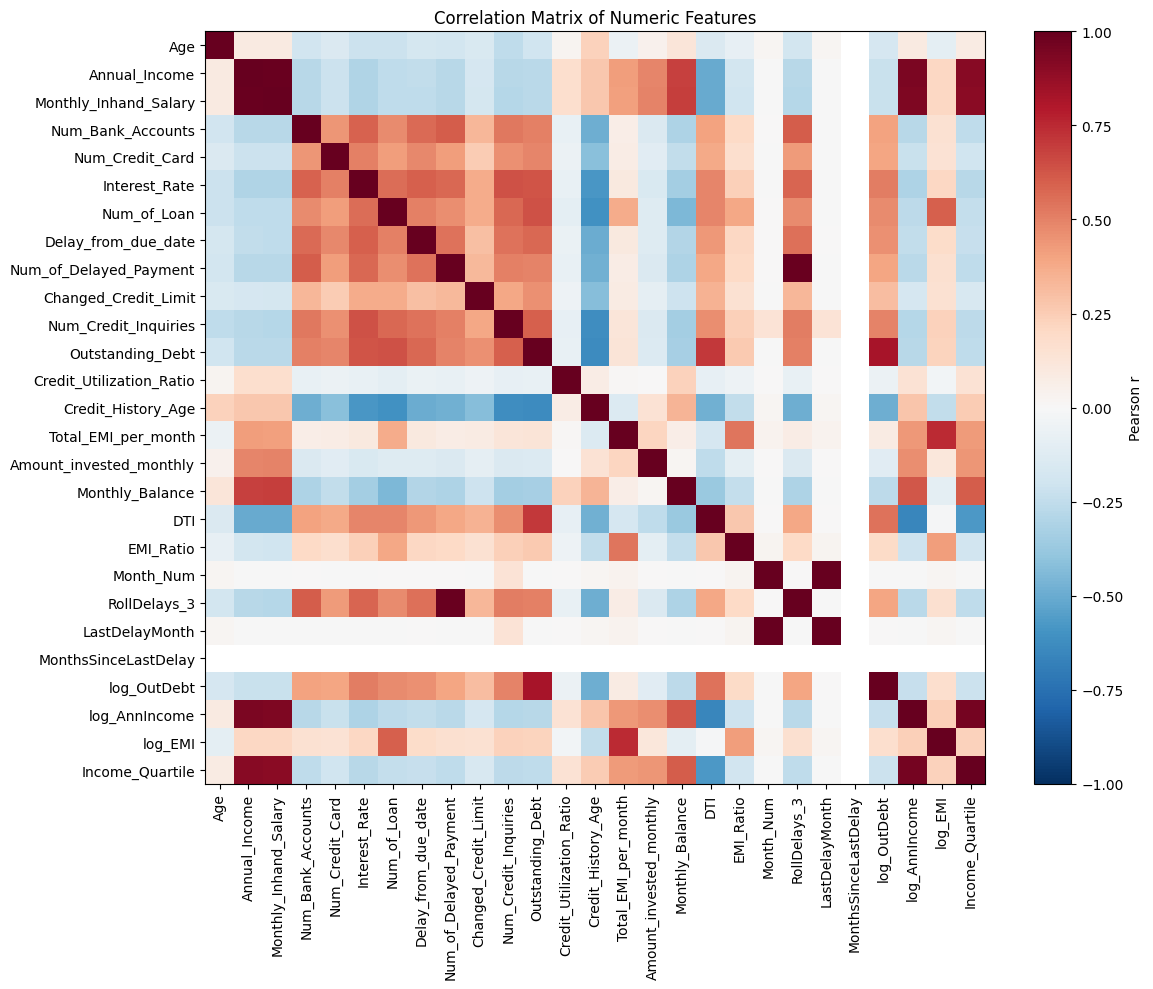

Highly correlated feature pairs (|r| > 0.7):
                 feature_1              feature_2      corr
0           LastDelayMonth              Month_Num  1.000000
1   Num_of_Delayed_Payment           RollDelays_3  0.989661
2            Annual_Income  Monthly_Inhand_Salary  0.986439
3          Income_Quartile          log_AnnIncome  0.954615
4            Annual_Income          log_AnnIncome  0.939079
5    Monthly_Inhand_Salary          log_AnnIncome  0.931928
6            Annual_Income        Income_Quartile  0.906734
7          Income_Quartile  Monthly_Inhand_Salary  0.902216
8         Outstanding_Debt            log_OutDebt  0.823655
9      Total_EMI_per_month                log_EMI  0.743623
10                     DTI       Outstanding_Debt  0.703380


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Grab just the numeric features (so categorical cuts like Age_Group/History_Length are excluded)
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

# 2. Compute the Pearson correlation matrix
corr = dataset[numeric_cols].corr()

# 3. Plot the heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(np.arange(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(np.arange(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# 4. Extract all unique feature‐pairs with |r| > 0.7
corr_pairs = (
    corr
      .abs()                          # absolute correlations
      .unstack()                      # long form
      .reset_index(name='corr')       # name the new column
)
corr_pairs.columns = ['feature_1', 'feature_2', 'corr']

# filter out self‐pairs and duplicates (A,B vs B,A)
strong_pairs = (
    corr_pairs[
        (corr_pairs['feature_1'] < corr_pairs['feature_2']) &
        (corr_pairs['corr'] > 0.7)
    ]
    .sort_values('corr', ascending=False)
    .reset_index(drop=True)
)

print("Highly correlated feature pairs (|r| > 0.7):")
print(strong_pairs)


# Modeling
You should implement AT LEAST FIVE approaches we covered, and tune of at least two hyperparameters of each approach.
Do not forget that you should split your data.
You should do model selection and tuning using cross validation on the train set, avoiding data leakage.
Explain and justify what is the metric you are using for model selection and tuning. If your data is imbalanced, consider using techniques for data balancing.

Separately, you should train a neural network. Visualize the training and validation loss. Discuss the network performance

In model selection, make sure when you compare different models and approaches that you compare them on the same dataset, though different transformations could be applied to the comparison dataset.

Scoring Metrics Consideration

1. **Accuracy**: Measures the percentage of correct predictions (TP + TN) over all cases, but can be misleading if classes are imbalanced.
2. **Precision and Recall (per class)**: Useful when you want to minimize false positives and false negatives, respectively.
   - **Precision (good)**: Important if approving a risky (“bad”) loan as “good” carries high cost.
   - **Recall (bad)**: Crucial if failing to identify bad loans results in severe financial losses.
3. **F1-Score**: Harmonic mean of precision and recall. We’ll report macro-F1 to give equal weight to each class in the presence of imbalance.
4. **Area Under the ROC Curve (AUC-ROC)**: Measures class separability across all thresholds (using one-vs-rest in multi-class). A higher AUC indicates better overall discrimination.

Given the importance of both correctly flagging high-risk (“bad”) loans and reliably approving low-risk (“good”) ones F1-score (macro-F1) is likely the most appropriate metric.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

data = dataset.copy()
# Separate features and target
target_col = 'Credit_Score' 
X = data.drop(columns=[target_col]).copy()

# Explicit category order
encoder = OrdinalEncoder(categories=[['poor', 'standard', 'good']])

# Must be 2D input
y = data[[target_col]].copy()
y[target_col] = encoder.fit_transform(y[[target_col]]).astype(int)

# 2) Split off test set (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

# 3) Split train vs. validation (of the remaining 85%, we want ~70/15 overall)
val_fraction = 0.15 / 0.85   # ≈0.1765
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=val_fraction,
    stratify=y_train_val,
    random_state=42
)

# 4) Quick check of class distributions
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Val   distribution:\n", y_val.value_counts(normalize=True))
print("Test  distribution:\n", y_test.value_counts(normalize=True))


Train distribution:
 Credit_Score
1               0.531736
0               0.289976
2               0.178288
Name: proportion, dtype: float64
Val   distribution:
 Credit_Score
1               0.531765
0               0.289981
2               0.178255
Name: proportion, dtype: float64
Test  distribution:
 Credit_Score
1               0.531733
0               0.290000
2               0.178267
Name: proportion, dtype: float64


In [28]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import train_test_split, HalvingRandomSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC
from scipy.stats import loguniform

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Subset
import pytorch_lightning as pl
from torchmetrics import Accuracy, F1Score
from torchvision import datasets, transforms
from torchinfo import summary
from torchmetrics.regression import MeanAbsoluteError
from  pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import CSVLogger, TensorBoardLogger

import os
import json
import sklearn

In [29]:
existing_dummies = [
    'Loan_Auto_Loan',
    'Loan_Business_Loan',
    'Loan_Durable_Goods_Loan',
    'Loan_Education_Loan',
    'Loan_Home_Loan',
    'Loan_Medical_Loan',
    'Loan_Other_Loan',
    'Loan_Personal_Loan',
    'Loan_Used_Car_Loan'
]

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
ordinal_features = ["Credit_Mix", "Age_Group", "History_Length"]
nominal_features = [col for col in categorical_features if col not in ordinal_features and col not in existing_dummies]
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

credit_mix_order    = ["bad", "standard", "good"]

ordinal_categories = [
    credit_mix_order
]

In [32]:
models = {
    'logistic_regression': {
        'estimator': LogisticRegression(random_state=42, n_jobs=-1),
        'parameter_grid': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear'],
            'classifier__class_weight': [None, 'balanced'],
            'classifier__max_iter': [100, 200, 500]
        },
        'smotenc': True,
        'scaling': True,
        'encoding': True,
        'encode_label': False
    },
    'decision_tree': {
        'estimator': DecisionTreeClassifier(random_state=42),
        'parameter_grid': {
            'classifier__max_depth': [3, 5, 7, 10],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__class_weight': ['balanced']
        },
        'smotenc': True,
        'scaling': False,
        'encoding': True,
        'encode_label': False
    },
    'random_forest': {
        'estimator': RandomForestClassifier(random_state=42, n_jobs=-1),
        'parameter_grid': {
            'classifier__n_estimators': [50, 100, 150],
            'classifier__max_depth': [3, 5, 7, 10],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__max_features': ['sqrt'],
            'classifier__bootstrap': [True],
            'classifier__class_weight': ['balanced']
        },
        'smotenc': False,
        'scaling': False,
        'encoding': True,
        'encode_label': False
    },
    'gradient_boosting': {
        'estimator': GradientBoostingClassifier(random_state=42),
        'parameter_grid': {
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__n_estimators': [100, 300],
            'classifier__max_depth': [3, 5],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 3],
            'classifier__subsample': [0.8, 1.0],
            'classifier__max_features': ['sqrt', 0.8]
        },
        'smotenc': False,
        'scaling': False,
        'encoding': True,
        'encode_label': False
    },
    'xgboost': {
        'estimator': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42),
        'parameter_grid': {
            'classifier__n_estimators': [100, 300],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5],
            'classifier__min_child_weight': [1, 5],
            'classifier__subsample': [0.8],
            'classifier__colsample_bytree': [0.8],
            'classifier__scale_pos_weight': [1, 5]
        },
        'smotenc': False,
        'scaling': False,
        'encoding': True,
        'encode_label': True
    },
    'lightgbm': {
        'estimator': LGBMClassifier(random_state=42, n_jobs=-1),
        'parameter_grid': {
            'classifier__num_leaves': [31, 50],
            'classifier__max_depth': [3, 5],
            'classifier__min_data_in_leaf': [50, 100],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__n_estimators': [100, 300],
            'classifier__feature_fraction': [0.8, 1.0],
            'classifier__bagging_fraction': [0.8],
            'classifier__bagging_freq': [3]
        },
        'smotenc': False,
        'scaling': False,
        'encoding': True,
        'encode_label': False
    },
    'catboost': {
        'estimator': CatBoostClassifier(random_state=42),
        'parameter_grid': {
            'classifier__iterations': [300, 500],
            'classifier__learning_rate': [0.03, 0.05],
            'classifier__depth': [4, 6],
            'classifier__l2_leaf_reg': [3, 5],
            'classifier__bagging_temperature': [0.5, 1.0],
        },
        'smotenc': False,
        'scaling': False,
        'encoding': True,
        'encode_label': False
    },
    'knn': {
        'estimator': KNeighborsClassifier(n_jobs=-1),
        'parameter_grid': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['distance'],
            'classifier__metric': ['minkowski', 'manhattan'],
            'classifier__p': [1, 2]
        },
        'smotenc': True,
        'scaling': True,
        'encoding': True,
        'encode_label': False
    },
    'neural_network': {
        'estimator': MLPClassifier(
            early_stopping=True,
            random_state=42
        ),
        'parameter_grid': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'classifier__solver': ['adam', 'sgd', 'lbfgs'],
            'classifier__alpha': np.linspace(1e-5, 1e-2, 5),
            'classifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
        },
        'smotenc': True,
        'scaling': True,
        'encoding': True
    }
}

In [33]:
def create_pipeline(model_config):

    pipeline_terms = []

    numeric_steps = [('imputer', SimpleImputer(strategy='median'))]
    if models[model_config]['scaling'] or models[model_config]['smotenc']:
        numeric_steps.append(('scaler', StandardScaler()))
    numeric_transformer = Pipeline(steps=numeric_steps)

    nominal_steps = [('imputer', SimpleImputer(strategy='most_frequent'))]
    if models[model_config]['encoding'] or models[model_config]['smotenc']:
        nominal_steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    nominal_transformer = Pipeline(steps=nominal_steps)

    ordinal_steps = [('imputer', SimpleImputer(strategy='most_frequent'))]
    if models[model_config]['encoding'] or models[model_config]['smotenc']:
        ordinal_steps.append(('ordinal', OrdinalEncoder(categories=ordinal_categories, dtype=int, handle_unknown='use_encoded_value', unknown_value=-1)))
    ordinal_transformer = Pipeline(steps=ordinal_steps)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('nominal', nominal_transformer, nominal_features),
            ('ordinal', ordinal_transformer, ordinal_features)
        ],
        remainder='passthrough'
    )

    pipeline_terms.append(('preprocessor', preprocessor))

    if models[model_config]['smotenc']:
        cat_len = len(nominal_features) + len(ordinal_features)
        categorical_indices = list(range(len(numerical_features), len(numerical_features) + cat_len))
        pipeline_terms.append(('smotenc', SMOTENC(categorical_features=categorical_indices, random_state=42)))

    pipeline_terms.append(('classifier', models[model_config]['estimator']))

    pipeline = ImbPipeline(pipeline_terms)

    return pipeline

In [44]:
# Running the different models

results = {}

for model_config in models:
    print(f"Running model: {model_config}")

    pipeline = create_pipeline(model_config)

    min_res = 500
    max_attempts = 10
    success = False

    for attempt in range(max_attempts):
        try:
            search = HalvingRandomSearchCV(
                estimator=pipeline,
                param_distributions=models[model_config]['parameter_grid'],
                resource='n_samples',
                factor=5,
                min_resources=min_res,
                max_resources=3000,  
                n_candidates=20,
                random_state=42,
                verbose=1,
                scoring='f1_macro',
                n_jobs=-1,
                cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
            )
            search.fit(X_train, y_train)
            success = True
            break
        except ValueError as e:
            if "n_neighbors" in str(e):
                print(f"min_resources={min_res} failed due to SMOTE. Increasing.")
                min_res += 100
            else:
                raise e

    best_model = search.best_estimator_
    best_params = search.best_params_
    best_score = search.best_score_

    best_model_data = {
        'model': model_config,
        'best_model': best_model,
        'best_params': best_params,
        'best_score': best_score
    }

    results[model_config] = best_model_data

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by='best_score', ascending=False)

Running model: logistic_regression
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

----------
iter: 1
n_candidates: 4
n_resources: 2500
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anacond

Running model: decision_tree
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 4
n_resources: 2500
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Running model: random_forest
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

----------
iter: 1
n_candidates: 4
n_resources: 2500
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

Running model: gradient_boosting
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array w

----------
iter: 1
n_candidates: 4
n_resources: 2500
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array w

Running model: xgboost
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:22] WARNING: /Users/runner/work/xgboost/xgboost/src/

----------
iter: 1
n_candidates: 4
n_resources: 2500
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:47:31] WARNING: /Users/runner/work/xgboost/xgboost/src/

Running model: lightgbm
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=3, subsample_

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWar


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will 

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current valu

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_dat

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be 

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored.

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Start training from score -1.254266
[LightGBM] [Info] Start training from score -0.631993
[LightGBM] [Info] Start training from score -1.697269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: 

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warnin

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warnin

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagg

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagg

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, 

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 1666, number of used features: 52
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Info] Start training from score -0.624715
[LightGBM] [Info] Start training from score -1.721087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] 

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, 

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

----------
iter: 1
n_candidates: 3
n_resources: 2500
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Running model: neural_network
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 500
max_resources_: 3000
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 20
n_resources: 500
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:112

----------
iter: 1
n_candidates: 4
n_resources: 2500
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:112

In [45]:
results_df.head(10)

model  \
random_forest              random_forest   
catboost                        catboost   
xgboost                          xgboost   
decision_tree              decision_tree   
lightgbm                        lightgbm   
gradient_boosting      gradient_boosting   
logistic_regression  logistic_regression   
neural_network            neural_network   
knn                                  knn   

                                                            best_model  \
random_forest        (ColumnTransformer(remainder='passthrough',\n ...   
catboost             (ColumnTransformer(remainder='passthrough',\n ...   
xgboost              (ColumnTransformer(remainder='passthrough',\n ...   
decision_tree        (ColumnTransformer(remainder='passthrough',\n ...   
lightgbm             (ColumnTransformer(remainder='passthrough',\n ...   
gradient_boosting    (ColumnTransformer(remainder='passthrough',\n ...   
logistic_regression  (ColumnTransformer(remainder='passthrough',\n ...   
neural_network       (ColumnTransformer(remainder='passthrough',\n ...   
knn                  (ColumnTransformer(remainder='passthrough',\n ...   

                                                           best_params  \
random_forest        {'classifier__n_estimators': 100, 'classifier_...   
catboost             {'classifier__learning_rate': 0.03, 'classifie...   
xgboost              {'classifier__subsample': 0.8, 'classifier__sc...   
decision_tree        {'classifier__min_samples_split': 5, 'classifi...   
lightgbm             {'classifier__num_leaves': 31, 'classifier__n_...   
gradient_boosting    {'classifier__subsample': 0.8, 'classifier__n_...   
logistic_regression  {'classifier__solver': 'liblinear', 'classifie...   
neural_network       {'classifier__solver': 'lbfgs', 'classifier__l...   
knn                  {'classifier__weights': 'distance', 'classifie...   

                     best_score  
random_forest          0.662623  
catboost               0.655940  
xgboost                0.654580  
decision_tree          0.649933  
lightgbm               0.643135  
gradient_boosting      0.637709  
logistic_regression    0.617479  
neural_network         0.576666  
knn                    0.561729

In [46]:
from sklearn.metrics import classification_report

# Store validation results
validation_results = {}

for model_name, model_data in results.items():
    best_model = model_data['best_model']

    # Make predictions on the validation set
    y_val_pred = best_model.predict(X_val)

    # Generate classification report
    report_dict = classification_report(y_val, y_val_pred, output_dict=True)
    f1_macro_val = report_dict['macro avg']['f1-score']

    validation_results[model_name] = {
        'classification_report': report_dict,
        'f1_macro_val': f1_macro_val,
        'model': best_model
    }

# Convert to DataFrame for sorting
val_results_df = pd.DataFrame([
    {
        'model_name': name,
        'f1_macro_val': data['f1_macro_val'],
        'classification_report': data['classification_report'],
        'model': data['model']
    }
    for name, data in validation_results.items()
])

# Sort by f1_macro in descending order
val_results_df = val_results_df.sort_values(by='f1_macro_val', ascending=False)

# Display the sorted results
val_results_df.head(10)


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


model_name  f1_macro_val  \
7                  knn      0.794680   
3    gradient_boosting      0.696138   
5             lightgbm      0.686150   
4              xgboost      0.678860   
6             catboost      0.676324   
8       neural_network      0.673308   
2        random_forest      0.662697   
1        decision_tree      0.653497   
0  logistic_regression      0.639915   

                               classification_report  \
7  {'0': {'precision': 0.7768158783783784, 'recal...   
3  {'0': {'precision': 0.7448313384113167, 'recal...   
5  {'0': {'precision': 0.7496411139821992, 'recal...   
4  {'0': {'precision': 0.7293399889073766, 'recal...   
6  {'0': {'precision': 0.7297599106644332, 'recal...   
8  {'0': {'precision': 0.6322158301924221, 'recal...   
2  {'0': {'precision': 0.6287090558766859, 'recal...   
1  {'0': {'precision': 0.6109848484848485, 'recal...   
0  {'0': {'precision': 0.5958890441029735, 'recal...   

                                               model  
7  (ColumnTransformer(remainder='passthrough',\n ...  
3  (ColumnTransformer(remainder='passthrough',\n ...  
5  (ColumnTransformer(remainder='passthrough',\n ...  
4  (ColumnTransformer(remainder='passthrough',\n ...  
6  (ColumnTransformer(remainder='passthrough',\n ...  
8  (ColumnTransformer(remainder='passthrough',\n ...  
2  (ColumnTransformer(remainder='passthrough',\n ...  
1  (ColumnTransformer(remainder='passthrough',\n ...  
0  (ColumnTransformer(remainder='passthrough',\n ...

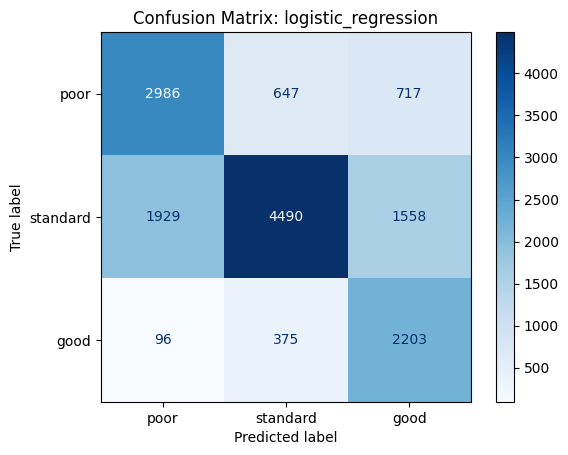

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      4350
           1       0.81      0.56      0.67      7977
           2       0.49      0.82      0.62      2674

    accuracy                           0.65     15001
   macro avg       0.63      0.69      0.64     15001
weighted avg       0.69      0.65      0.65     15001



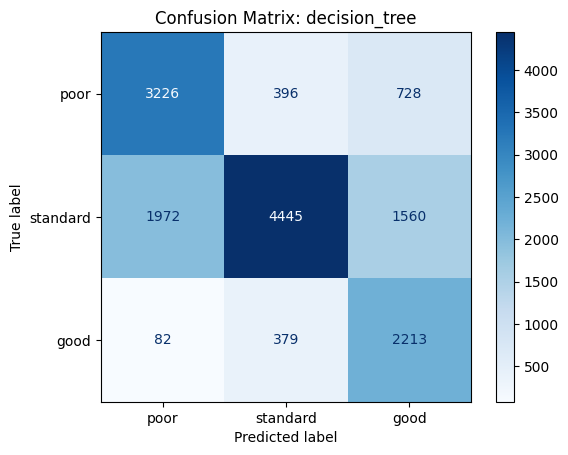

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      4350
           1       0.85      0.56      0.67      7977
           2       0.49      0.83      0.62      2674

    accuracy                           0.66     15001
   macro avg       0.65      0.71      0.65     15001
weighted avg       0.72      0.66      0.66     15001



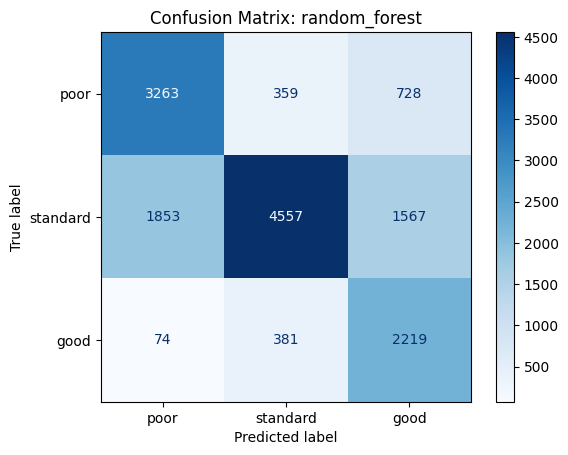

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      4350
           1       0.86      0.57      0.69      7977
           2       0.49      0.83      0.62      2674

    accuracy                           0.67     15001
   macro avg       0.66      0.72      0.66     15001
weighted avg       0.73      0.67      0.67     15001



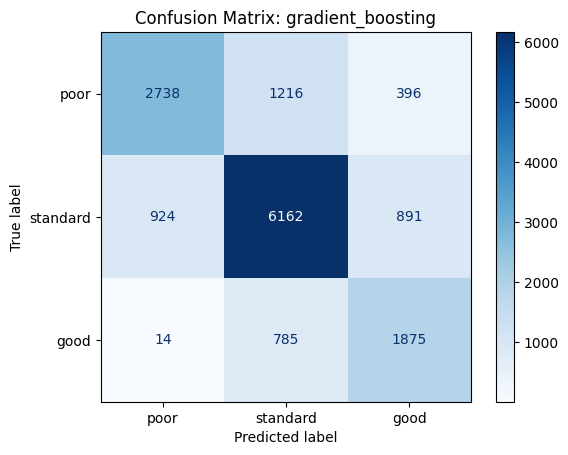

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      4350
           1       0.75      0.77      0.76      7977
           2       0.59      0.70      0.64      2674

    accuracy                           0.72     15001
   macro avg       0.70      0.70      0.70     15001
weighted avg       0.72      0.72      0.72     15001



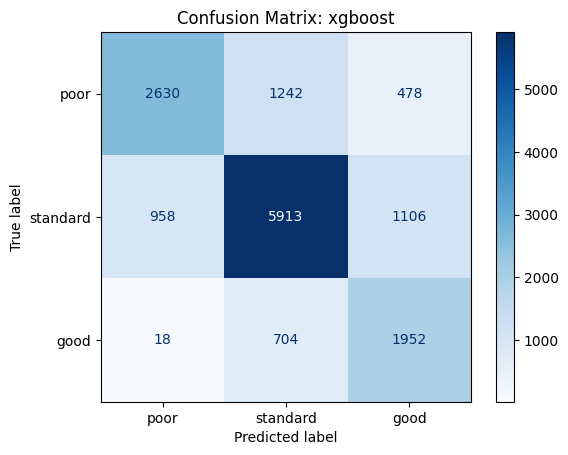

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.60      0.66      4350
           1       0.75      0.74      0.75      7977
           2       0.55      0.73      0.63      2674

    accuracy                           0.70     15001
   macro avg       0.68      0.69      0.68     15001
weighted avg       0.71      0.70      0.70     15001

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


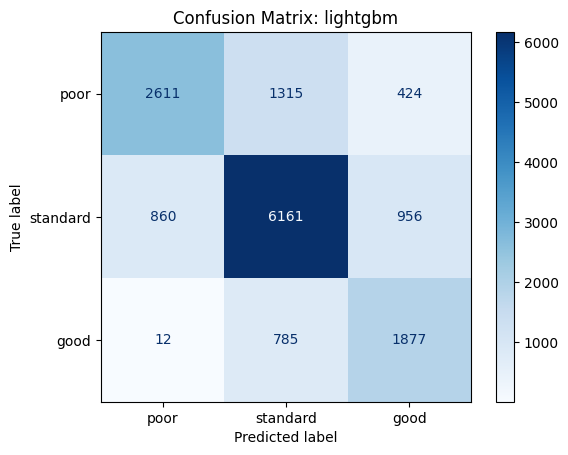

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.60      0.67      4350
           1       0.75      0.77      0.76      7977
           2       0.58      0.70      0.63      2674

    accuracy                           0.71     15001
   macro avg       0.69      0.69      0.69     15001
weighted avg       0.72      0.71      0.71     15001



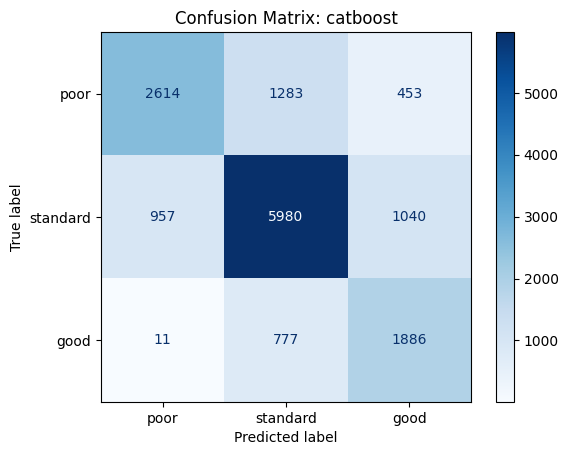

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.60      0.66      4350
           1       0.74      0.75      0.75      7977
           2       0.56      0.71      0.62      2674

    accuracy                           0.70     15001
   macro avg       0.68      0.69      0.68     15001
weighted avg       0.71      0.70      0.70     15001



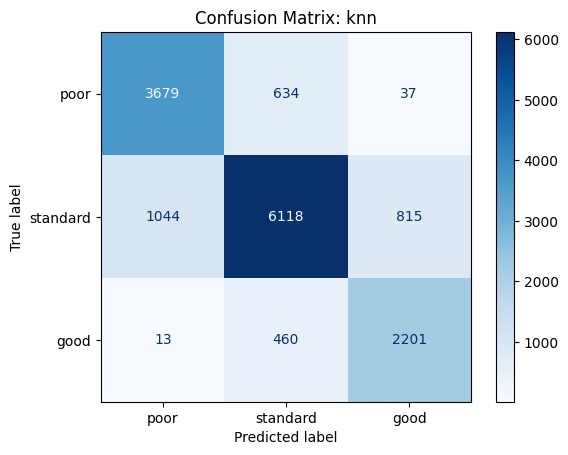

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      4350
           1       0.85      0.77      0.81      7977
           2       0.72      0.82      0.77      2674

    accuracy                           0.80     15001
   macro avg       0.78      0.81      0.79     15001
weighted avg       0.80      0.80      0.80     15001



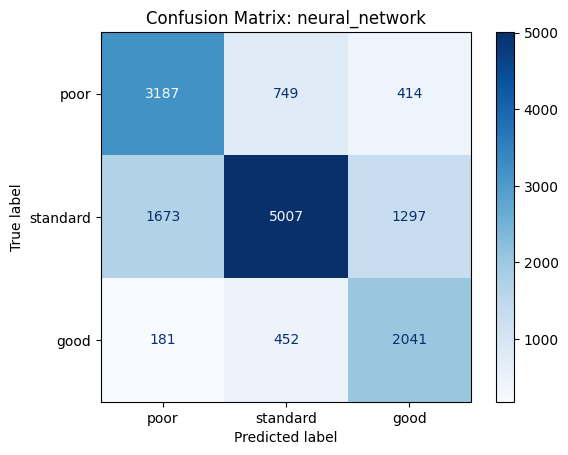

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      4350
           1       0.81      0.63      0.71      7977
           2       0.54      0.76      0.64      2674

    accuracy                           0.68     15001
   macro avg       0.66      0.71      0.67     15001
weighted avg       0.71      0.68      0.69     15001



In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_labels = ['poor', 'standard', 'good']
from sklearn.metrics import classification_report

# Evaluate and plot confusion matrix for each best model
for model_name, model_data in results.items():
    best_model = model_data['best_model']
    
    # Predict on the test set
    y_val_pred = best_model.predict(X_val)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    class_report = classification_report(y_val, y_val_pred)
    print("Classification Report:\n")
    print(class_report)


While several models showed promise, knn achieved the highest validation F1-macro and also demonstrated strong precision and high recall for the critical bad credit class. Its interpretability is moderate, allowing for examination of influential neighbors. Given its superior predictive performance in this validation, knn is selected as the final model.

In [48]:
# Get the best model (top row in the sorted table)
best_model_row = val_results_df.iloc[0]
best_model_name = best_model_row['model_name']
best_model_pipeline = best_model_row['model']

best_model = best_model_pipeline.fit(X_train_val, y_train_val)

/opt/anaconda3/envs/try5/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [49]:
from sklearn.metrics import classification_report

y_test_pred = best_model.predict(X_test)
report_str = classification_report(y_test, y_test_pred)
print("Classification Report:\n")
print(report_str)

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4350
           1       0.85      0.78      0.81      7976
           2       0.74      0.83      0.78      2674

    accuracy                           0.81     15000
   macro avg       0.79      0.82      0.80     15000
weighted avg       0.81      0.81      0.81     15000



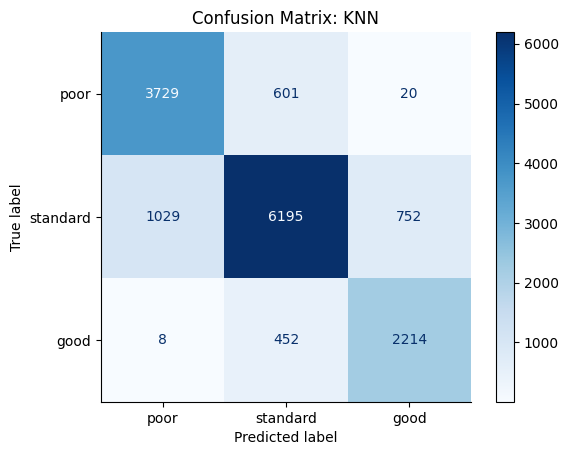

In [98]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix: KNN')
plt.show()

### Model evaluation

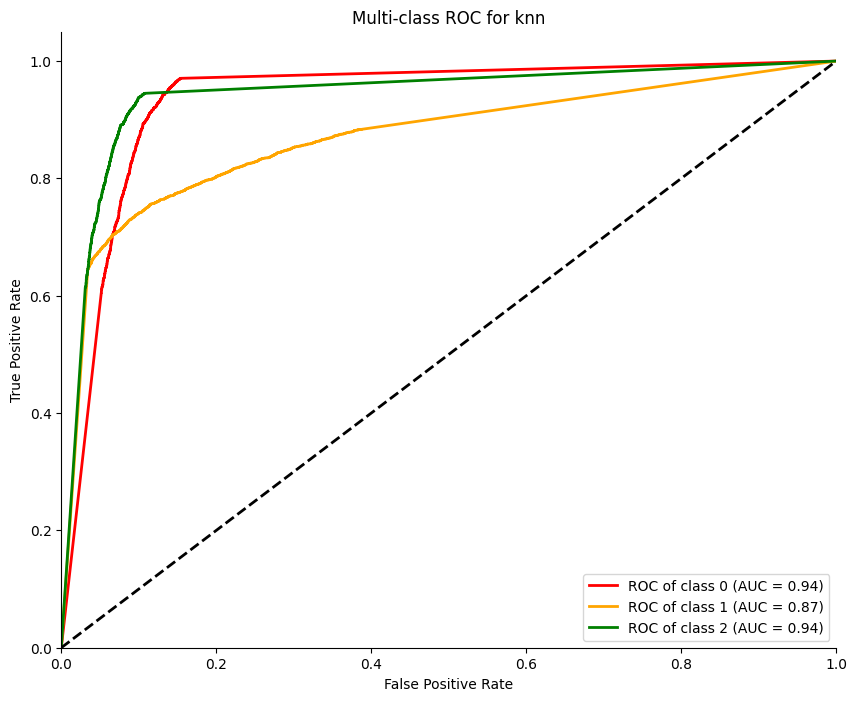

In [93]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics      import roc_curve, auc
import matplotlib.pyplot  as plt

# assume y_test_orig is your 1D array/Series of {0,1,2} labels
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# get predicted probabilities
y_score = best_model.predict_proba(X_test)

# compute per-class ROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _   = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i]          = auc(fpr[i], tpr[i])

# plot
plt.figure(figsize=(10,8))
colors = ['red','orange','green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             color=colors[i],
             lw=2,
             label=f'ROC of class {best_model.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title(f'Multi-class ROC for {best_model_name}')
plt.legend(loc='lower right')
plt.show()


In [77]:
from sklearn.metrics import classification_report

mask = val_results_df["model_name"] == "decision_tree"

# extract the name (string) and the pipeline (object) with .iloc[0]
baseline_model_name = val_results_df.loc[mask, "model_name"].iloc[0]
baseline_pipeline     = val_results_df.loc[mask, "model"     ].iloc[0]

# fit the pipeline
baseline_model = baseline_pipeline.fit(X_train_val, y_train_val)

# make predictions and print report
y_test_pred_baseline = baseline_model.predict(X_test)
report_baseline      = classification_report(y_test, y_test_pred_baseline)

print(f"Baseline model: {baseline_model_name}\n")
print("Classification Report:\n", report_baseline)

Baseline model: decision_tree

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67      4350
           1       0.86      0.56      0.68      7976
           2       0.49      0.84      0.62      2674

    accuracy                           0.66     15000
   macro avg       0.65      0.71      0.66     15000
weighted avg       0.72      0.66      0.66     15000



In [78]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_test_pred)
mmc_base = matthews_corrcoef(y_test,y_test_pred_baseline)
print(f"Our model’s MCC of {mcc:.4f} exceeds the baseline decision tree’s MCC of {mmc_base:.4f}, demonstrating improved classification performance.")

Our model’s MCC of 0.6921 exceeds the baseline decision tree’s MCC of 0.5085, demonstrating improved classification performance.


In [79]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_test_pred)
kappa_base = cohen_kappa_score(y_test,y_test_pred_baseline)
print(f"Our model’s Cohen’s Kappa of {kappa:.4f} surpasses the baseline decision tree’s Kappa of {kappa_base:.4f}, indicating stronger agreement between our predictions and the true labels.")

Our model’s Cohen’s Kappa of 0.6900 surpasses the baseline decision tree’s Kappa of 0.4867, indicating stronger agreement between our predictions and the true labels.


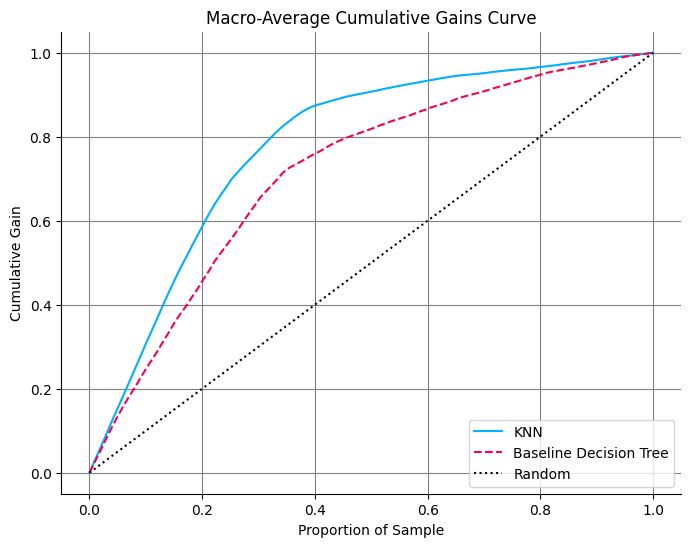

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# your classes
classes = [0, 1, 2]

# 1) Binarize y_test into one-vs-rest format
y_test_bin = label_binarize(y_test, classes=classes)    # shape = (n_samples, 3)

# 2) Get predicted probabilities
y_score_model = best_model    .predict_proba(X_test)    # shape = (n_samples, 3)
y_score_base  = baseline_model.predict_proba(X_test)    # same

# 3) Helper to compute per-class pct_sample & gain
def cumulative_gain(y_true_cls, y_score_cls):
    df = pd.DataFrame({'y': y_true_cls, 'score': y_score_cls})
    df = df.sort_values('score', ascending=False).reset_index(drop=True)
    df['cum_pos']    = df['y'].cumsum()
    total_pos        = df['y'].sum()
    df['gain']       = df['cum_pos'] / total_pos
    df['pct_sample'] = (np.arange(len(df)) + 1) / len(df)
    return df['pct_sample'].values, df['gain'].values

# 4) Build a common interpolation grid
grid = np.linspace(0, 1, 100)

# 5) Compute per-class interpolated gains
gains_model = []
gains_base  = []
for i in range(len(classes)):
    pct_m, gain_m = cumulative_gain(y_test_bin[:, i], y_score_model[:, i])
    pct_b, gain_b = cumulative_gain(y_test_bin[:, i], y_score_base[:, i])
    gains_model.append(np.interp(grid, pct_m, gain_m))
    gains_base.append (np.interp(grid, pct_b, gain_b))

# 6) Macro-average across classes
macro_gain_model = np.mean(gains_model, axis=0)
macro_gain_base  = np.mean(gains_base,  axis=0)

# 7) Plot
plt.figure(figsize=(8, 6))
plt.plot(grid, macro_gain_model, label='KNN')
plt.plot(grid, macro_gain_base,  '--', label='Baseline Decision Tree')
plt.plot([0, 1], [0, 1],     'k:', label='Random')
plt.xlabel('Proportion of Sample')
plt.ylabel('Cumulative Gain')
plt.title('Macro-Average Cumulative Gains Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Model interpretation

Use at least two different techniques for model interpretability. Discuss what are the most important features of your model, and how they impact the model performance. Pick a few examples of errors that your model is making, and check which features lead to thess errors.


In [99]:
from sklearn.inspection import permutation_importance
perm_pipe = permutation_importance(best_model_pipeline, X_test, y_test, n_repeats=1, random_state=42, n_jobs=-1)

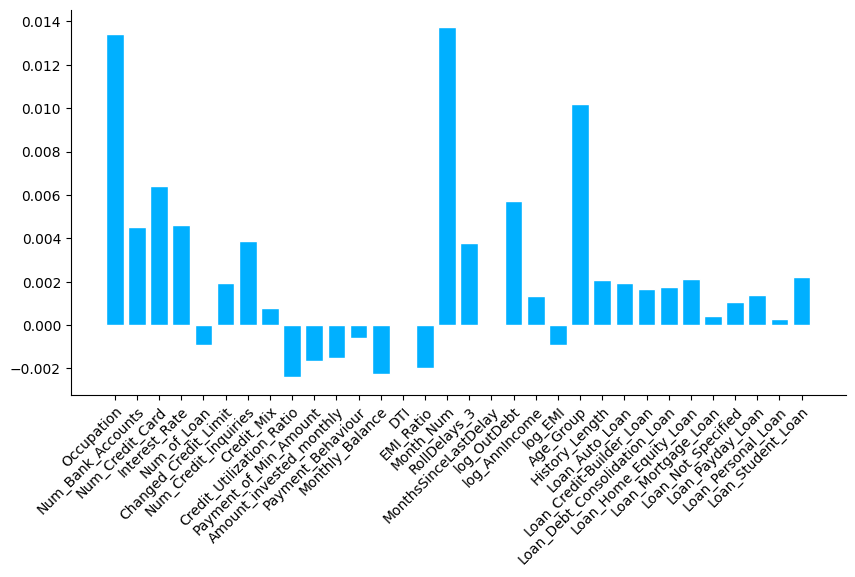

In [103]:
feat_import_perm = perm_pipe.importances_mean
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(feat_import_perm)), feat_import_perm, align="center")
ax.set(xticks=range(len(feat_import_perm)), xticklabels=X_train.columns)
# Set properties of x axis using setp, we will rotate the labels by 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

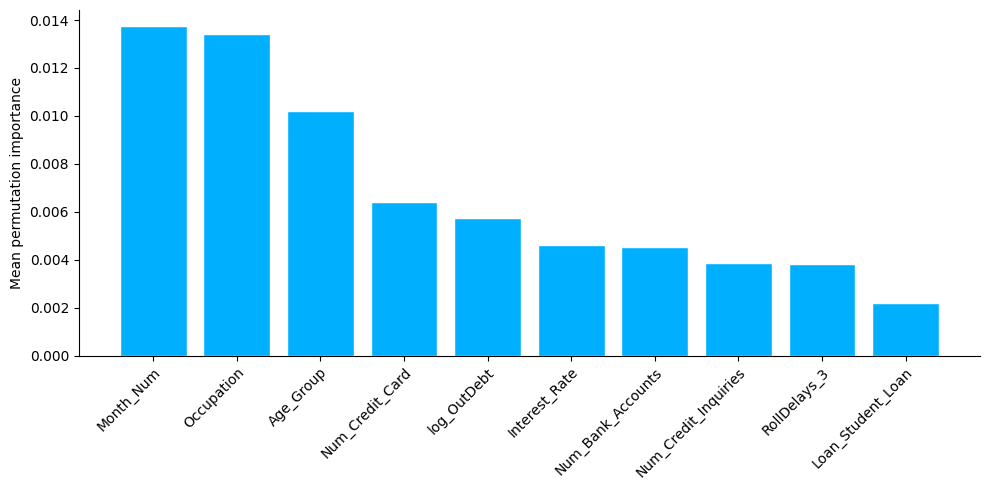

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# feat_import_perm: 1D array of importances
# X_train.columns: Index of feature names

# 1) find the indices of the top-10 importances (descending)
top10_idx = np.argsort(feat_import_perm)[-10:][::-1]

# 2) select their names & values
top10_names  = X_train.columns[top10_idx]
top10_values = feat_import_perm[top10_idx]

# 3) plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(10), top10_values, align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(top10_names, rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("Mean permutation importance")
plt.tight_layout()
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

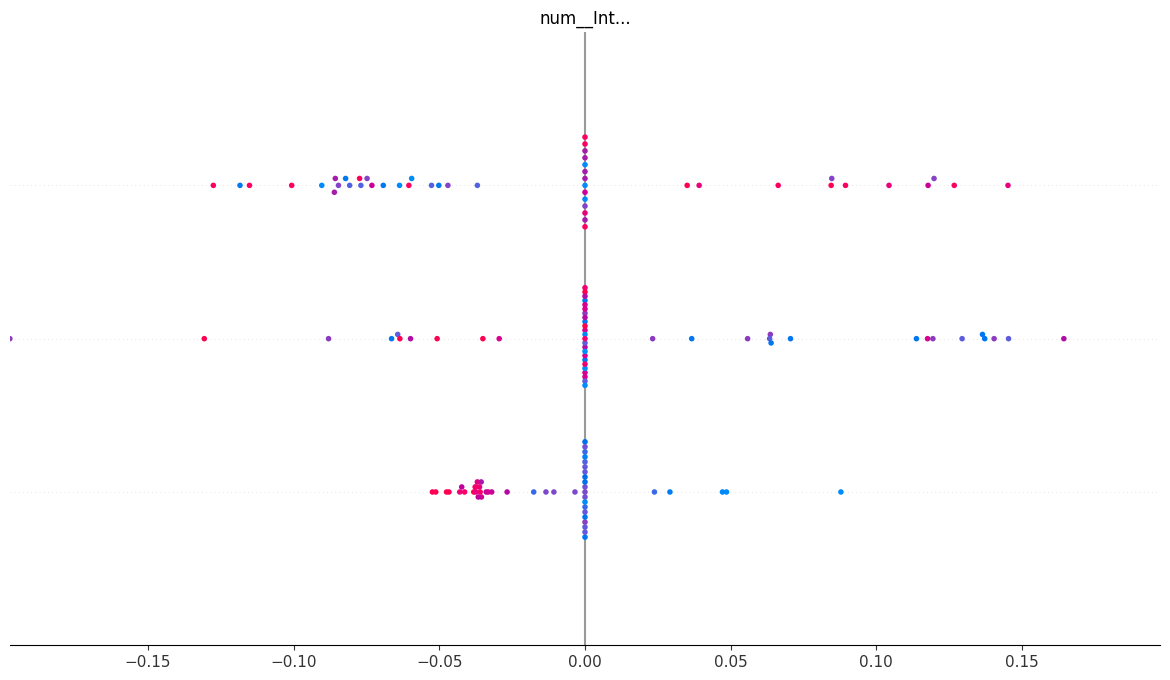

In [107]:
import shap
import pandas as pd


# 1) Extract the preprocessing pipeline and classifier
preprocessor = best_model.named_steps['preprocessor']
classifier   = best_model.named_steps['classifier']

# 2) Transform X_test (skip any resampling steps—only use the preprocessor)
X_test_proc = preprocessor.transform(X_test)

# 3) Get the transformed feature names
feat_names = preprocessor.get_feature_names_out()

# 4) Build a DataFrame for readability and pick the first N rows to explain
number_datapoints = 50
X_df       = pd.DataFrame(X_test_proc, columns=feat_names)
X_explain  = X_df.iloc[:number_datapoints]

# 5) Create a small k-means background dataset (20 centroids)
background = shap.kmeans(X_explain, 20)

# 6) Instantiate the KernelExplainer using predict_proba
explainer = shap.KernelExplainer(
    classifier.predict_proba,  # model’s probability output
    background                  # small, representative background
)

# 7) Compute SHAP values (this returns a list of arrays, one per class)
shap_values = explainer.shap_values(
    X_explain,
    nsamples="auto"            # you can set an integer for speed/accuracy trade-off
)


--- Generating SHAP Summary Plots for Each Class (plot_type='dot') ---
Assuming 'shap_values_from_explainer' is a 3D NumPy array (num_samples, num_features, num_classes).
Using X_explain with shape: (50, 53)
Classifier classes: [0 1 2]

--- Plotting for Class: 0 (Index 0) ---
Shape of SHAP values being plotted for class '0': (50, 53)


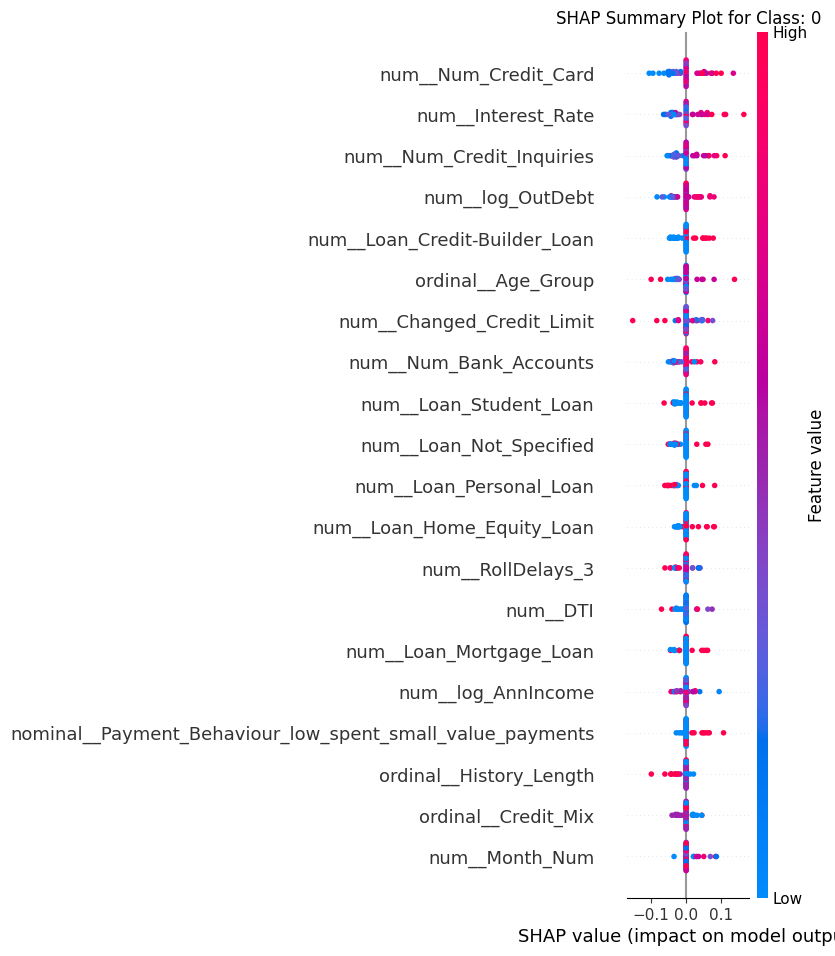


--- Plotting for Class: 1 (Index 1) ---
Shape of SHAP values being plotted for class '1': (50, 53)


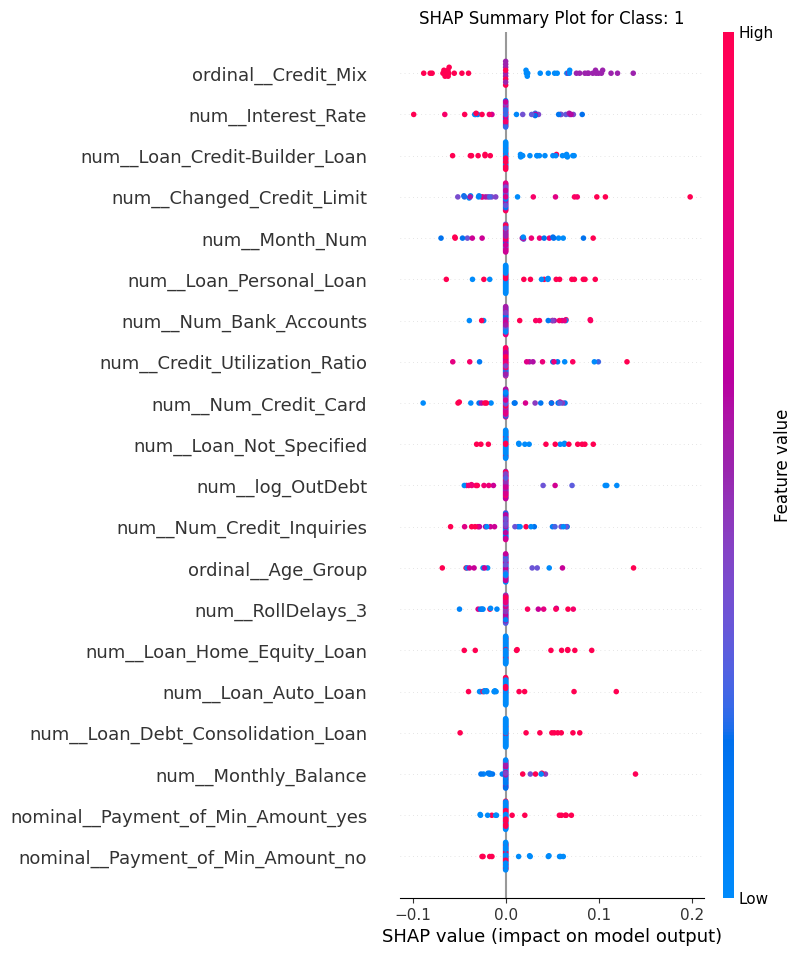


--- Plotting for Class: 2 (Index 2) ---
Shape of SHAP values being plotted for class '2': (50, 53)


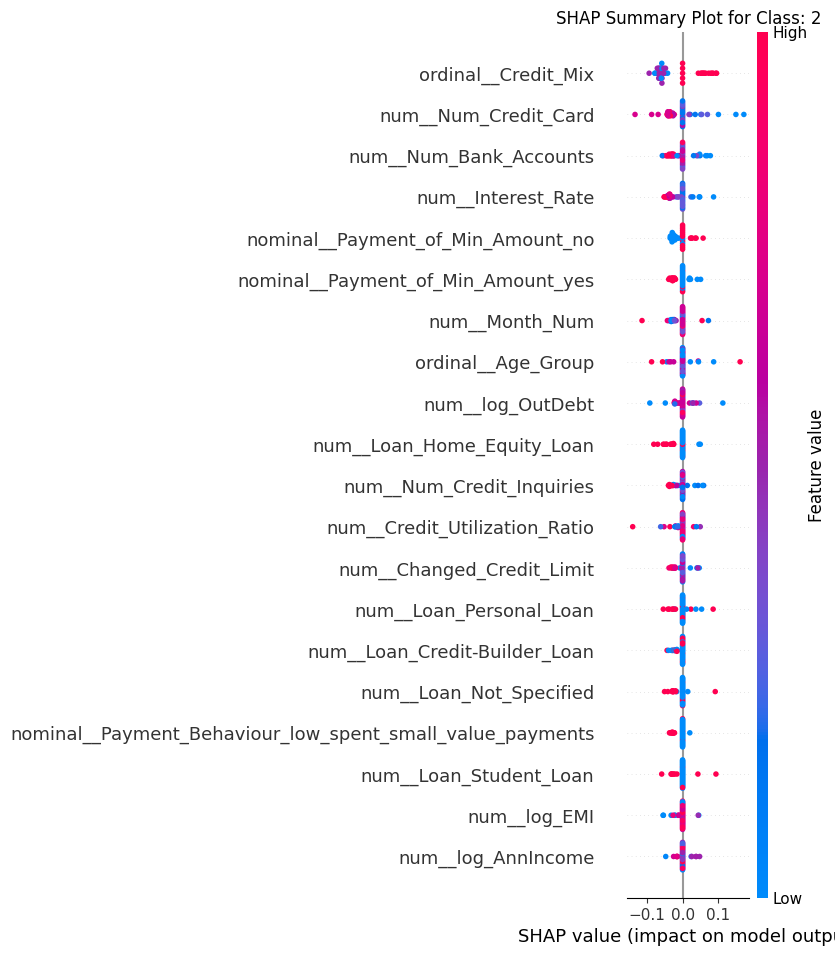


--- Plotting complete ---


In [118]:
import shap
import numpy as np # Ensure NumPy is imported
import matplotlib.pyplot as plt
import pandas as pd # Ensure Pandas is imported

# --- Ensure these variables are already defined in your environment ---
# shap_values_from_explainer: The 3D NumPy array of SHAP values.
# X_explain: The DataFrame used for SHAP explanations.
# classifier: Your trained classifier model.
# --- Example (make sure your actual variable names are used) ---
# shap_values_from_explainer = your_shap_output_variable_name
# X_explain = your_data_frame_variable_name
# classifier = your_classifier_variable_name

# Define how many top features to display in each plot
num_features_to_display = 20

# --- Start of Streamlined Plotting Code ---

print(f"--- Generating SHAP Summary Plots for Each Class (plot_type='dot') ---")
print(f"Assuming 'shap_values_from_explainer' is a 3D NumPy array (num_samples, num_features, num_classes).")
print(f"Using X_explain with shape: {X_explain.shape}") # Should be (num_samples, num_features)
print(f"Classifier classes: {classifier.classes_}")    # Should match the 3rd dimension of shap_values_from_explainer

for i, class_name_label in enumerate(classifier.classes_):
    print(f"\n--- Plotting for Class: {class_name_label} (Index {i}) ---")
    
    # Slice the 3D array to get SHAP values for the current class i
    # This extracts a 2D array (num_samples, num_features)
    shap_values_for_class_i = shap_values_from_explainer[:, :, i]
    
    print(f"Shape of SHAP values being plotted for class '{class_name_label}': {shap_values_for_class_i.shape}")

    # Call SHAP's summary plot
    shap.summary_plot(
        shap_values_for_class_i,  # Expected shape: (num_samples, num_features)
        X_explain,                # Expected shape: (num_samples, num_features)
        plot_type='dot',
        max_display=num_features_to_display,
        show=False                # Delay showing to add title before plt.show()
    )
    plt.title(f"SHAP Summary Plot for Class: {class_name_label}")
    plt.show()

print("\n--- Plotting complete ---")

### Neural Network

In [ ]:
torch.manual_seed(42)

cat_len = len(nominal_features) + len(ordinal_features)
categorical_indices = list(range(len(numerical_features), len(numerical_features) + cat_len))

# Define Main Preprocessor for Features
# 1) Numeric pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
])

# 2) Ordinal pipeline
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=ordinal_categories,
        dtype=int,
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
])

# 3) One-hot pipeline
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',      OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

# 4) Combine all into a single ColumnTransformer
preprocess = ColumnTransformer(transformers=[
    ('num', numerical_transformer,   numerical_features),
    ('ord', ordinal_transformer,     ordinal_features),
    ('ohe', onehot_transformer,      ordinal_features),
], remainder='drop')

nn_pipeline = ImbPipeline([
    ('preprocessor', preprocess),
    ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)),
])

# Preprocessing
X_train_res, y_train_res = nn_pipeline.fit_resample(X_train, y_train)
X_val_processed = preprocess.transform(X_val)
X_test_processed = preprocess.transform(X_test)

# Prepare tensors from your pandas splits

train_ds = TensorDataset(
    torch.from_numpy(X_train_res).float(),
    torch.from_numpy(y_train_res.values.squeeze()).long()
)
val_ds = TensorDataset(
    torch.from_numpy(X_val_processed).float(),
    torch.from_numpy(y_val.values.squeeze()).long()
)
test_ds = TensorDataset(
    torch.from_numpy(X_test_processed).float(),
    torch.from_numpy(y_test.values.squeeze()).long()
)

# Dataloaders
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4)
val_loader   = DataLoader(val_ds,   batch_size=64, shuffle=False, num_workers=4)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=4)



class CreditScoreModel(pl.LightningModule):
    def __init__(self, input_dim: int,
                 hidden_dims=(128, 64),
                 dropout_p=0.5,
                 lr=1e-3):
        super().__init__()
        h1, h2 = hidden_dims
        self.save_hyperparameters()

        # build the network
        self.model = nn.Sequential(
            nn.Linear(input_dim, h1),
            nn.ReLU(),
            nn.Dropout(dropout_p),

            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Dropout(dropout_p),

            nn.Linear(h2, 3)   # 3 classes: bad, standard, good
        )

        # explicitly initialize weights
        self.model.apply(self._init_weights)

        # loss and metrics
        self.loss_fn   = nn.CrossEntropyLoss()
        self.train_acc = Accuracy(task="multiclass", num_classes=3)
        self.val_acc   = Accuracy(task="multiclass", num_classes=3)
        self.test_acc  = Accuracy(task="multiclass", num_classes=3)

        # F1 macro 
        self.train_f1 = F1Score(task="multiclass", num_classes=3, average='macro')
        self.val_f1   = F1Score(task="multiclass", num_classes=3, average='macro')
        self.test_f1  = F1Score(task="multiclass", num_classes=3, average='macro')

    def _init_weights(self, module):
        """He initialization on layers before ReLU, Xavier on the final layer."""
        if isinstance(module, nn.Linear):
            if module.out_features == 3:
                nn.init.xavier_normal_(module.weight)
            else:
                nn.init.kaiming_normal_(module.weight, nonlinearity='relu')
            if module.bias is not None:
                nn.init.zeros_(module.bias)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        preds = torch.argmax(logits, dim=1)

        # update metrics
        acc_val = self.train_acc(preds, y)  # returns the batch acc
        f1_val  = self.train_f1(preds, y)   # returns the batch F1

        # 1. train_loss step → prog bar only
        self.log(
            "train_loss_step", loss.detach(),
            prog_bar=True, on_step=True, on_epoch=False, logger=False
        )
        # 2. train_loss epoch → CSVLogger (and others)
        self.log(
            "train_loss", loss.detach(),
            on_step=False, on_epoch=True, logger=True
        )
        # 3. train_acc epoch → CSVLogger
        self.log(
            "train_acc", self.train_acc,
            on_step=False, on_epoch=True, logger=True
        )
        # 4. train_f1 epoch → CSVLogger
        self.log(
            "train_f1", self.train_f1,
            on_step=False, on_epoch=True, logger=True
        )
        # 5.log the step-level F1 to progress bar
        self.log(
            "train_f1_step", f1_val,
            prog_bar=True, on_step=True, on_epoch=False, logger=False
        )

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        preds = torch.argmax(logits, dim=1)

        # update metrics
        self.val_acc(preds, y)
        self.val_f1(preds, y)

        # log losses and metrics (epoch-only)
        self.log("val_loss", loss,    on_step=False, on_epoch=True)
        self.log("val_acc",  self.val_acc, on_step=False, on_epoch=True)
        self.log("val_f1",   self.val_f1,  on_step=False, on_epoch=True)

        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        preds = torch.argmax(logits, dim=1)

        # update metrics
        self.test_acc(preds, y)
        self.test_f1(preds, y)

        # log losses and metrics (epoch-only)
        self.log("test_loss", loss,     on_step=False, on_epoch=True)
        self.log("test_acc",  self.test_acc, on_step=False, on_epoch=True)
        self.log("test_f1",   self.test_f1,  on_step=False, on_epoch=True)

        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.hparams.lr)



: 

In [39]:
first_x, _ = train_ds[0]
input_dim = first_x.shape[0]
input_dim

hidden_dims = results_df[results_df['model'] == 'neural_network']['best_params'].values[0]['classifier__hidden_layer_sizes']
lr = results_df[results_df['model'] == 'neural_network']['best_params'].values[0]['classifier__learning_rate_init']

model = CreditScoreModel(input_dim=input_dim,
                         hidden_dims=hidden_dims,
                         dropout_p=0.5,
                         lr=lr)

In [40]:
summary(model, input_size=(input_dim,))

Layer (type:depth-idx)                   Output Shape              Param #
CreditScoreModel                         [3]                       --
├─Sequential: 1-1                        [3]                       --
│    └─Linear: 2-1                       [100]                     3,000
│    └─ReLU: 2-2                         [100]                     --
│    └─Dropout: 2-3                      [100]                     --
│    └─Linear: 2-4                       [50]                      5,050
│    └─ReLU: 2-5                         [50]                      --
│    └─Dropout: 2-6                      [50]                      --
│    └─Linear: 2-7                       [3]                       153
Total params: 8,203
Trainable params: 8,203
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.55
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03

In [41]:
print(model)

CreditScoreModel(
  (model): Sequential(
    (0): Linear(in_features=29, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=3, bias=True)
  )
  (loss_fn): CrossEntropyLoss()
  (train_acc): MulticlassAccuracy()
  (val_acc): MulticlassAccuracy()
  (test_acc): MulticlassAccuracy()
  (train_f1): MulticlassF1Score()
  (val_f1): MulticlassF1Score()
  (test_f1): MulticlassF1Score()
)


In [42]:
csv_logger = CSVLogger(                        
    save_dir="CreditScoreModel-model-csv"    
)

# Callbacks: monitor val_f1 for both checkpointing and early stop
checkpoint_cb = ModelCheckpoint(
    monitor="val_f1",                     
    mode="max",                           
    save_top_k=1,                         
    dirpath="checkpoints",                
    filename="credit-{epoch:02d}-{val_f1:.3f}",  
    verbose=True,
)
earlystop_cb = EarlyStopping(
    monitor="val_f1",                    
    mode="max",
    patience=5,                           # no improvement in 5 epochs → stop
    verbose=True,
)

#Trainer
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    logger=csv_logger,
    callbacks=[checkpoint_cb, earlystop_cb],
)

trainer.fit(
    model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\desou\anaconda3\envs\ml2025\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\desou\Documents\Nova SBE - Master's in Finance\S2\Introduction to Machine Learning\review_2\group-project\checkpoints exists and is not empty.

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | Sequential         | 8.2 K  | train
1 | loss_fn   | CrossEntropyLoss   | 0      | train
2 | train_acc | MulticlassAccuracy | 0      | train
3 | val_acc   | MulticlassAccuracy | 0      | train
4 | test_acc  | MulticlassAccuracy | 0      | train
5 | train_f1  | MulticlassF1Score  | 0      | train
6 | val_f1    | MulticlassF1Score  | 0      | train
7 | test_f1   | MulticlassF1Score  | 0      | train
---------------------------------------------------------
8.2 K     Trainable par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\desou\anaconda3\envs\ml2025\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\desou\anaconda3\envs\ml2025\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 0: 100%|██████████| 1745/1745 [00:27<00:00, 63.43it/s, v_num=2, train_loss_step=0.685, train_f1_step=0.687]

Metric val_f1 improved. New best score: 0.656
Epoch 0, global step 1745: 'val_f1' reached 0.65598 (best 0.65598), saving model to "C:\\Users\\desou\\Documents\\Nova SBE - Master's in Finance\\S2\\Introduction to Machine Learning\\review_2\\group-project\\checkpoints\\credit-epoch=00-val_f1=0.656.ckpt" as top 1


Epoch 1: 100%|██████████| 1745/1745 [00:33<00:00, 52.75it/s, v_num=2, train_loss_step=0.700, train_f1_step=0.719]

Metric val_f1 improved by 0.003 >= min_delta = 0.0. New best score: 0.659
Epoch 1, global step 3490: 'val_f1' reached 0.65926 (best 0.65926), saving model to "C:\\Users\\desou\\Documents\\Nova SBE - Master's in Finance\\S2\\Introduction to Machine Learning\\review_2\\group-project\\checkpoints\\credit-epoch=01-val_f1=0.659.ckpt" as top 1


Epoch 2: 100%|██████████| 1745/1745 [00:26<00:00, 65.45it/s, v_num=2, train_loss_step=0.794, train_f1_step=0.600]

Metric val_f1 improved by 0.003 >= min_delta = 0.0. New best score: 0.662
Epoch 2, global step 5235: 'val_f1' reached 0.66234 (best 0.66234), saving model to "C:\\Users\\desou\\Documents\\Nova SBE - Master's in Finance\\S2\\Introduction to Machine Learning\\review_2\\group-project\\checkpoints\\credit-epoch=02-val_f1=0.662.ckpt" as top 1


Epoch 3: 100%|██████████| 1745/1745 [00:26<00:00, 65.42it/s, v_num=2, train_loss_step=0.625, train_f1_step=0.736]

Metric val_f1 improved by 0.000 >= min_delta = 0.0. New best score: 0.663
Epoch 3, global step 6980: 'val_f1' reached 0.66283 (best 0.66283), saving model to "C:\\Users\\desou\\Documents\\Nova SBE - Master's in Finance\\S2\\Introduction to Machine Learning\\review_2\\group-project\\checkpoints\\credit-epoch=03-val_f1=0.663.ckpt" as top 1


Epoch 4: 100%|██████████| 1745/1745 [00:45<00:00, 38.20it/s, v_num=2, train_loss_step=0.704, train_f1_step=0.724]

Epoch 4, global step 8725: 'val_f1' was not in top 1


Epoch 5: 100%|██████████| 1745/1745 [00:44<00:00, 38.93it/s, v_num=2, train_loss_step=0.612, train_f1_step=0.742]

Metric val_f1 improved by 0.000 >= min_delta = 0.0. New best score: 0.663
Epoch 5, global step 10470: 'val_f1' reached 0.66293 (best 0.66293), saving model to "C:\\Users\\desou\\Documents\\Nova SBE - Master's in Finance\\S2\\Introduction to Machine Learning\\review_2\\group-project\\checkpoints\\credit-epoch=05-val_f1=0.663-v1.ckpt" as top 1


Epoch 6: 100%|██████████| 1745/1745 [00:36<00:00, 47.66it/s, v_num=2, train_loss_step=0.689, train_f1_step=0.760]

Epoch 6, global step 12215: 'val_f1' was not in top 1


Epoch 7: 100%|██████████| 1745/1745 [00:51<00:00, 33.59it/s, v_num=2, train_loss_step=0.771, train_f1_step=0.638]

Epoch 7, global step 13960: 'val_f1' was not in top 1


Epoch 8: 100%|██████████| 1745/1745 [00:52<00:00, 33.25it/s, v_num=2, train_loss_step=0.873, train_f1_step=0.566]

Epoch 8, global step 15705: 'val_f1' was not in top 1


Epoch 9: 100%|██████████| 1745/1745 [00:30<00:00, 56.72it/s, v_num=2, train_loss_step=0.779, train_f1_step=0.643]

Metric val_f1 improved by 0.000 >= min_delta = 0.0. New best score: 0.663
Epoch 9, global step 17450: 'val_f1' reached 0.66318 (best 0.66318), saving model to "C:\\Users\\desou\\Documents\\Nova SBE - Master's in Finance\\S2\\Introduction to Machine Learning\\review_2\\group-project\\checkpoints\\credit-epoch=09-val_f1=0.663.ckpt" as top 1


Epoch 10: 100%|██████████| 1745/1745 [00:22<00:00, 78.34it/s, v_num=2, train_loss_step=0.894, train_f1_step=0.565]

Epoch 10, global step 19195: 'val_f1' was not in top 1


Epoch 11: 100%|██████████| 1745/1745 [00:22<00:00, 77.28it/s, v_num=2, train_loss_step=0.866, train_f1_step=0.569]

Epoch 11, global step 20940: 'val_f1' was not in top 1


Epoch 12: 100%|██████████| 1745/1745 [00:23<00:00, 75.06it/s, v_num=2, train_loss_step=0.877, train_f1_step=0.634]

Epoch 12, global step 22685: 'val_f1' was not in top 1


Epoch 13: 100%|██████████| 1745/1745 [00:22<00:00, 76.43it/s, v_num=2, train_loss_step=0.706, train_f1_step=0.692]

Epoch 13, global step 24430: 'val_f1' was not in top 1


Epoch 14: 100%|██████████| 1745/1745 [00:22<00:00, 77.45it/s, v_num=2, train_loss_step=0.628, train_f1_step=0.749]

Monitored metric val_f1 did not improve in the last 5 records. Best score: 0.663. Signaling Trainer to stop.
Epoch 14, global step 26175: 'val_f1' was not in top 1
`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 1745/1745 [00:22<00:00, 77.39it/s, v_num=2, train_loss_step=0.628, train_f1_step=0.749]


In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_performance(metrics_path):
    # find latest version folder
    logs_dir = os.path.join(metrics_path, 'lightning_logs')
    if os.path.exists(logs_dir):
        versions = [d for d in os.listdir(logs_dir) if d.startswith("version_")]
        latest_version = max(versions, key=lambda x: int(x.split("_")[1]))
    else:
        latest_version = 'version_0'

    # read in metrics.csv
    metrics_file = os.path.join(logs_dir, latest_version, 'metrics.csv')
    metrics_df = pd.read_csv(metrics_file)

    # collapse step‐wise NaNs by taking last non‐NaN per (epoch, step)
    metrics_df = (
        metrics_df
        .groupby(['epoch', 'step'], sort=False, as_index=False)
        .last()
        .reset_index(drop=True)
    )
    metrics_df['epoch'] += 1  # make epochs 1-indexed

    # set up three side‐by‐side plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) Loss
    axes[0].plot(metrics_df['epoch'], metrics_df['train_loss'], label='Training Loss')
    axes[0].plot(metrics_df['epoch'], metrics_df['val_loss'],   label='Validation Loss')
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].set_title("Training & Validation Loss")
    axes[0].legend()

    # 2) Accuracy ##question if we remove accuracy in our neural network as a whole because we focus on f1 macro score
    axes[1].plot(metrics_df['epoch'], metrics_df['train_acc'], label='Training Accuracy')
    axes[1].plot(metrics_df['epoch'], metrics_df['val_acc'],   label='Validation Accuracy')
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_title("Training & Validation Accuracy")
    axes[1].legend()

    # 3) F1 Macro
    axes[2].plot(metrics_df['epoch'], metrics_df['train_f1'], label='Training F1')
    axes[2].plot(metrics_df['epoch'], metrics_df['val_f1'],   label='Validation F1')
    axes[2].set_xlabel("Epoch")
    axes[2].set_ylabel("F1 Score")
    axes[2].set_title("Training & Validation F1 Macro")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    return metrics_df


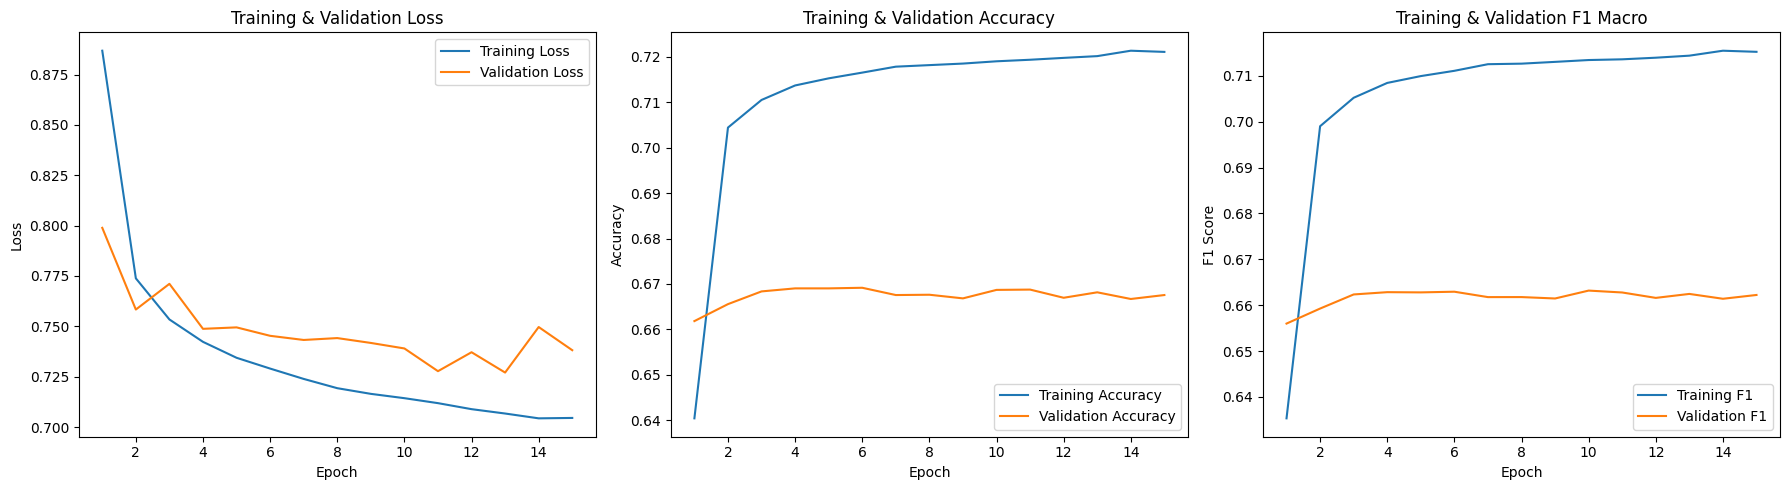

In [44]:
metrics_df=plot_performance('CreditScoreModel-model-csv')


In [45]:
trainer.test(model, dataloaders=test_loader)

c:\Users\desou\anaconda3\envs\ml2025\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 235/235 [00:01<00:00, 173.37it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.6687333583831787
         test_f1            0.6628830432891846
        test_loss           0.7329234480857849
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.7329234480857849,
  'test_acc': 0.6687333583831787,
  'test_f1': 0.6628830432891846}]